## MEMUAT DATA SET

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
data_clean = pd.read_csv('cleaning_dataset.csv')
data_clean

,Tweet
0,Ingat! Cantumkan Harta Saat Lapor SPT Tahunan Pajak https://t.co/pUlQMjTkZv
1,"@CNNIndonesia Dasar MALING BAJINGAN tengik bisa ngeles juga... Berapa banyak rakyat Indonesia yang hidup miskin, uangnya rakyat untuk foya-foya ASN dirjen pajak, Kemenkeu, beacukai...?"
2,@bendvi setuju mas! i’ve been travelled around the world and i can i say customs indonesia much better drpd negara lain. sepengalamanku jg kl ngenain pajak sesuai dgn aturan kok ini yg heboh ini itu cm krn gaterima aja ngeluarin uang utk penerimaan negara pdhl hrsny dia tau itu konsekuen
3,"Haduh..\n\nYg namanya lapor pajak mana ada yg pake 1 pembukuan di Indonesia ini..\n\nLedger 3..\n1. Pemegang saham..\n2. Internal..\n3. Pajak..\n\nBeda2 semua..\n\nLoe lapor semua mana bs cuan gede..\nApalagi pajak..\n\nBayar PPN, PPh badan, PPh Pribadi..\n\nSulap2 sm 'Konsultan' kek Alun.."
4,"@susipudjiastuti Indonesia dapet cukai import, per kg dpt cukai 1000 perak/ kg. Maka Indonesia akan mendapatkan pajak import 1000x1 000 000 000 =;Rp 1 000 T... mantaaap.."
...,...
7475,@BukanHindia (*) NPWP wajib bagi seluruh Wajib Pajak sesuai UU perpajakan yang berlaku di Indonesia.\nPersyaratan lainnya sbb: (2)
7476,"Mulai ngamuk.. Tak traktir ngopi, po? Tak jelasne sewengi sesuai UU tata negara, Sistem Pemerintahan, kenapa harus ada presiden, kenapa harus ada pajak, kenapa harus ada tata tertib, kenapa harus ada ini itu di Indonesia? Dijelasno neng kene suwen.."
7477,"@shxkkaku dengan /mnyebutnamadn/ di wakanda, passwordnya kopi kapal api, kopi orang indonesia\n\ncoba tebak saya siapa pak nanti dapat 3 jeti dipotong pajak, clue depannya ni belakangnya lou"
7478,@kring_pajak min bedanya penyertaan modal pada perusahaan yang sudah didirikan - kerjasama dengan lembaga pengelola investasi dan yang kerjasama dengan lembaga pengelola investasi - investasi langsung pada perusahaan di wilayah negara rep indonesia tuh apa ya?


## Pre-processing : Removing Punctuation, Case Folding & Removing Urls Username

In [2]:
import pandas as pd
import re

# Define regex patterns for URL, username, and hashtag
url_pattern = re.compile(r'http[s]?://\S+')
username_pattern = re.compile(r'@[A-Za-z0-9_]+')
hashtag_pattern = re.compile(r'#\w+\b')

# Define function for preprocessing
def preprocess_text(text):
    # Remove punctuation (except "@")
    text = re.sub(r'[^\w\s@]|[\d]', '', text)
    
    # Case folding
    text = text.lower()
    
    # Remove URL, username, and hashtag
    text = re.sub(url_pattern, '', text)
    text = re.sub(username_pattern, '', text)
    text = re.sub(hashtag_pattern, '', text)
    
    return text

# Read data from CSV file
data = data_clean

# Apply preprocessing function to 'Tweet' column
data['Tweet'] = data['Tweet'].apply(preprocess_text)

# Remove remaining URLs
data['Tweet'] = data['Tweet'].apply(lambda x: re.sub(r'http\S+|www.\S+', '', x))

data_pre = data


In [3]:
data_pre.head(5)

,Tweet
0,ingat cantumkan harta saat lapor spt tahunan pajak
1,dasar maling bajingan tengik bisa ngeles juga berapa banyak rakyat indonesia yang hidup miskin uangnya rakyat untuk foyafoya asn dirjen pajak kemenkeu beacukai
2,setuju mas ive been travelled around the world and i can i say customs indonesia much better drpd negara lain sepengalamanku jg kl ngenain pajak sesuai dgn aturan kok ini yg heboh ini itu cm krn gaterima aja ngeluarin uang utk penerimaan negara pdhl hrsny dia tau itu konsekuen
3,haduh\n\nyg namanya lapor pajak mana ada yg pake pembukuan di indonesia ini\n\nledger \n pemegang saham\n internal\n pajak\n\nbeda semua\n\nloe lapor semua mana bs cuan gede\napalagi pajak\n\nbayar ppn pph badan pph pribadi\n\nsulap sm konsultan kek alun
4,indonesia dapet cukai import per kg dpt cukai perak kg maka indonesia akan mendapatkan pajak import x rp t mantaaap


## Pre-processing : Normalisasi Kata Menggunakan Kamus Alay

In [4]:
import pandas as pd

# Load the colloquial Indonesian lexicon as a dictionary
kamus_alay = pd.read_csv('https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv', delimiter=',')
kamus_alay_dict = {}
for index, row in kamus_alay.iterrows():
    kamus_alay_dict[row['slang']] = row['formal']

# Read preprocessed tweet data into a DataFrame
data_norm = data_pre

# Apply normalization to 'Tweet' column
data_norm['Tweet_Normalized'] = data_norm['Tweet'].apply(lambda x: ' '.join([kamus_alay_dict[word] if word.lower() != 'spt' and word in kamus_alay_dict else word for word in x.split()]))

# Create new DataFrame for normalized tweet data
data_normalisasi = pd.DataFrame()
data_normalisasi['Word_Before_Normalization'] = data_norm['Tweet'].apply(lambda x: [word for word in x.split()])
data_normalisasi['Word_After_Normalization'] = data_norm['Tweet_Normalized'].apply(lambda x: [word for word in x.split()])



In [5]:
data_normalisasi.head(5)

,Word_Before_Normalization,Word_After_Normalization
0,"[ingat, cantumkan, harta, saat, lapor, spt, tahunan, pajak]","[ingat, cantumkan, harta, saat, lapor, spt, tahunan, pajak]"
1,"[dasar, maling, bajingan, tengik, bisa, ngeles, juga, berapa, banyak, rakyat, indonesia, yang, hidup, miskin, uangnya, rakyat, untuk, foyafoya, asn, dirjen, pajak, kemenkeu, beacukai]","[dasar, maling, bajingan, tengik, bisa, ngeles, juga, berapa, banyak, rakyat, indonesia, yang, hidup, miskin, uangnya, rakyat, untuk, foyafoya, asn, dirjen, pajak, kemenkeu, beacukai]"
2,"[setuju, mas, ive, been, travelled, around, the, world, and, i, can, i, say, customs, indonesia, much, better, drpd, negara, lain, sepengalamanku, jg, kl, ngenain, pajak, sesuai, dgn, aturan, kok, ini, yg, heboh, ini, itu, cm, krn, gaterima, aja, ngeluarin, uang, utk, penerimaan, negara, pdhl, hrsny, dia, tau, itu, konsekuen]","[setuju, mas, ive, been, travelled, around, the, world, and, i, can, i, sayang, customs, indonesia, much, better, daripada, negara, lain, sepengalamanku, juga, kalo, ngenain, pajak, sesuai, dengan, aturan, kok, ini, yang, heboh, ini, itu, cuma, karena, gaterima, saja, mengeluarkan, uang, untuk, penerimaan, negara, padahal, harusny, dia, tau, itu, konsekuen]"
3,"[haduh, yg, namanya, lapor, pajak, mana, ada, yg, pake, pembukuan, di, indonesia, ini, ledger, pemegang, saham, internal, pajak, beda, semua, loe, lapor, semua, mana, bs, cuan, gede, apalagi, pajak, bayar, ppn, pph, badan, pph, pribadi, sulap, sm, konsultan, kek, alun]","[aduh, yang, namanya, lapor, pajak, mana, ada, yang, pakai, pembukuan, di, indonesia, ini, ledger, pemegang, saham, internal, pajak, beda, semua, lo, lapor, semua, mana, bisa, cuan, gede, apalagi, pajak, bayar, ppn, pph, badan, pph, pribadi, sulap, sama, konsultan, kayak, alun]"
4,"[indonesia, dapet, cukai, import, per, kg, dpt, cukai, perak, kg, maka, indonesia, akan, mendapatkan, pajak, import, x, rp, t, mantaaap]","[indonesia, dapat, cukai, import, per, kg, dapat, cukai, perak, kg, maka, indonesia, akan, mendapatkan, pajak, import, kali, rp, t, mantap]"


In [6]:
data_normalisasi_kata = pd.DataFrame(data_normalisasi['Word_After_Normalization'].apply(lambda x: ' '.join(x)), columns=['Word_After_Normalization'])


## Pre-processing : Stopwords Removal

In [7]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

Normalisasi = data_normalisasi_kata.copy() # Menggunakan DataFrame "data_normalisasi_kata"

# Mengambil kamus stop words bahasa Indonesia dari NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

# Fungsi untuk melakukan stopword removal
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Mengaplikasikan fungsi remove_stopwords pada kolom "Tweet"
Normalisasi['Word_After_Normalization_StopWords'] = Normalisasi['Word_After_Normalization'].apply(remove_stopwords)

# Menyimpan hasil dalam DataFrame stopword_removal
data_stopwords = Normalisasi

data_stopwords


[nltk_data] Downloading package stopwords to C:\Users\Dewan Dinata
[nltk_data]     Tarigan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Word_After_Normalization,Word_After_Normalization_StopWords
0,ingat cantumkan harta saat lapor spt tahunan pajak,cantumkan harta lapor spt tahunan pajak
1,dasar maling bajingan tengik bisa ngeles juga berapa banyak rakyat indonesia yang hidup miskin uangnya rakyat untuk foyafoya asn dirjen pajak kemenkeu beacukai,dasar maling bajingan tengik ngeles rakyat indonesia hidup miskin uangnya rakyat foyafoya asn dirjen pajak kemenkeu beacukai
2,setuju mas ive been travelled around the world and i can i sayang customs indonesia much better daripada negara lain sepengalamanku juga kalo ngenain pajak sesuai dengan aturan kok ini yang heboh ini itu cuma karena gaterima saja mengeluarkan uang untuk penerimaan negara padahal harusny dia tau itu konsekuen,setuju mas ive been travelled around the world and i can i sayang customs indonesia much better negara sepengalamanku kalo ngenain pajak sesuai aturan heboh gaterima mengeluarkan uang penerimaan negara harusny tau konsekuen
3,aduh yang namanya lapor pajak mana ada yang pakai pembukuan di indonesia ini ledger pemegang saham internal pajak beda semua lo lapor semua mana bisa cuan gede apalagi pajak bayar ppn pph badan pph pribadi sulap sama konsultan kayak alun,aduh namanya lapor pajak pakai pembukuan indonesia ledger pemegang saham internal pajak beda lo lapor cuan gede pajak bayar ppn pph badan pph pribadi sulap konsultan kayak alun
4,indonesia dapat cukai import per kg dapat cukai perak kg maka indonesia akan mendapatkan pajak import kali rp t mantap,indonesia cukai import kg cukai perak kg indonesia pajak import kali rp t mantap
...,...,...
7475,npwp wajib bagi seluruh wajib pajak sesuai uu perpajakan yang berlaku di indonesia persyaratan lainnya sebab,npwp wajib wajib pajak sesuai uu perpajakan berlaku indonesia persyaratan
7476,mulai ngamuk tak traktir ngopi po tak jelasne sewengi sesuai uu tata negara sistem pemerintahan kenapa harus ada presiden kenapa harus ada pajak kenapa harus ada tata tertib kenapa harus ada ini itu di indonesia dijelasno neng kene suwen,ngamuk traktir ngopi po jelasne sewengi sesuai uu tata negara sistem pemerintahan presiden pajak tata tertib indonesia dijelasno neng kene suwen
7477,dengan mnyebutnamadn di wakanda passwordnya kopi kapal api kopi orang indonesia coba tebak saya siapa pak nanti dapat jeti dipotong pajak clue depannya nih belakangnya lou,mnyebutnamadn wakanda passwordnya kopi kapal api kopi orang indonesia coba tebak jeti dipotong pajak clue depannya nih belakangnya lou
7478,min bedanya penyertaan modal pada perusahaan yang sudah didirikan kerjasama dengan lembaga pengelola investasi dan yang kerjasama dengan lembaga pengelola investasi investasi langsung pada perusahaan di wilayah negara rep indonesia tuh apa ya,min bedanya penyertaan modal perusahaan didirikan kerjasama lembaga pengelola investasi kerjasama lembaga pengelola investasi investasi langsung perusahaan wilayah negara rep indonesia tuh ya


## Pre-processing : Stemming PySastrawi

In [8]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# Read normalized tweet data into a DataFrame
data_stem = data_stopwords

# Define stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Define function for stemming
def stem_text(text):
    # Tokenize text by whitespace
    words = text.split()
    
    # Apply stemming to each word
    stemmed_words = [stemmer.stem(word) for word in words]
    
    # Join stemmed words back into text
    stemmed_text = ' '.join(stemmed_words)
    
    return stemmed_text

# Apply stemming to 'Word_After_Normalization' column
data_stem['Word_Stemmed'] = data_stem['Word_After_Normalization_StopWords'].apply(stem_text)

data_stem.to_csv('stemming.csv', index=False)


In [9]:
words_df = pd.DataFrame()
words_df['Before_Stemming'] = data_stem['Word_After_Normalization_StopWords'].str.split().explode().reset_index(drop=True)
words_df['After_Stemming'] = data_stem['Word_Stemmed'].str.split().explode().reset_index(drop=True)
pd.set_option('display.max_colwidth', None)

words_df.head(20)

,Before_Stemming,After_Stemming
0,cantumkan,cantum
1,harta,harta
2,lapor,lapor
3,spt,spt
4,tahunan,tahun
5,pajak,pajak
6,dasar,dasar
7,maling,maling
8,bajingan,bajing
9,tengik,tengik


In [10]:
import pandas as pd
look_labeled = pd.read_csv('stemming.csv')
look_labeled.head(5)

,Word_After_Normalization,Word_After_Normalization_StopWords,Word_Stemmed
0,ingat cantumkan harta saat lapor spt tahunan pajak,cantumkan harta lapor spt tahunan pajak,cantum harta lapor spt tahun pajak
1,dasar maling bajingan tengik bisa ngeles juga berapa banyak rakyat indonesia yang hidup miskin uangnya rakyat untuk foyafoya asn dirjen pajak kemenkeu beacukai,dasar maling bajingan tengik ngeles rakyat indonesia hidup miskin uangnya rakyat foyafoya asn dirjen pajak kemenkeu beacukai,dasar maling bajing tengik ngeles rakyat indonesia hidup miskin uang rakyat foyafoya asn dirjen pajak kemenkeu beacukai
2,setuju mas ive been travelled around the world and i can i sayang customs indonesia much better daripada negara lain sepengalamanku juga kalo ngenain pajak sesuai dengan aturan kok ini yang heboh ini itu cuma karena gaterima saja mengeluarkan uang untuk penerimaan negara padahal harusny dia tau itu konsekuen,setuju mas ive been travelled around the world and i can i sayang customs indonesia much better negara sepengalamanku kalo ngenain pajak sesuai aturan heboh gaterima mengeluarkan uang penerimaan negara harusny tau konsekuen,tuju mas ive been travelled around the world and i can i sayang customs indonesia much better negara alam kalo ngenain pajak sesuai atur heboh gaterima keluar uang terima negara harusny tau konsekuen
3,aduh yang namanya lapor pajak mana ada yang pakai pembukuan di indonesia ini ledger pemegang saham internal pajak beda semua lo lapor semua mana bisa cuan gede apalagi pajak bayar ppn pph badan pph pribadi sulap sama konsultan kayak alun,aduh namanya lapor pajak pakai pembukuan indonesia ledger pemegang saham internal pajak beda lo lapor cuan gede pajak bayar ppn pph badan pph pribadi sulap konsultan kayak alun,aduh nama lapor pajak pakai buku indonesia ledger pegang saham internal pajak beda lo lapor cuan gede pajak bayar ppn pph badan pph pribadi sulap konsultan kayak alun
4,indonesia dapat cukai import per kg dapat cukai perak kg maka indonesia akan mendapatkan pajak import kali rp t mantap,indonesia cukai import kg cukai perak kg indonesia pajak import kali rp t mantap,indonesia cukai import kg cukai perak kg indonesia pajak import kali rp t mantap


## Pre-processing : Pelabelan Menggunakan Inset

In [11]:
import pandas as pd

# Fungsi untuk memuat lexicon InSet
def load_inset(filename):
    inset = {}
    with open(filename) as f:
        # baca baris pertama untuk skip header
        next(f)
        for line in f:
            word, score = line.strip().split("\t")
            score = int(score)
            if score < -5:
                score = -5
            elif score > 5:
                score = 5
            inset[word] = score
    return inset


# Fungsi untuk memuat kedua file lexicon InSet (positive.tsv dan negative.tsv) dan menggabungkannya menjadi satu dictionary
def load_inset_lexicon():
    positive_file = "positive.tsv"
    negative_file = "negative.tsv"
    
    positive_lexicon = load_inset(positive_file)
    negative_lexicon = load_inset(negative_file)
    
    # Gabungkan kedua lexicon
    inset_lexicon = {**positive_lexicon, **negative_lexicon}
    
    return inset_lexicon

# Fungsi untuk melakukan pelabelan sentimen pada sebuah kalimat
def get_sentiment(sentence, lexicon):
    words = sentence.split()
    sentiment = 0
    for word in words:
        if word in lexicon:
            sentiment += lexicon[word]
    return sentiment

# Fungsi untuk menentukan kategori sentimen
def get_sentiment_category(sentiment):
    if sentiment > 0:
        return "Positive"
    elif sentiment < 0:
        return "Negative"
    else:
        return "Neutral"

# Fungsi untuk mendapatkan nilai polarisasi setiap kata
def get_word_polarities(text, lexicon):
    words = text.split()
    polarities = []
    for word in words:
        if word in lexicon:
            polarity = lexicon[word]
            polarities.append((word, polarity))
    return polarities

# Memuat dataset
data_labeled = pd.read_csv("stemming.csv")

# Memuat lexicon InSet
inset_lexicon = load_inset_lexicon()

# Melakukan pelabelan sentimen pada dataset
sentiments = []
sentiment_categories = []
for sentence in data_labeled["Word_Stemmed"]:
    sentiment = get_sentiment(sentence, inset_lexicon)
    sentiment_category = get_sentiment_category(sentiment)
    sentiments.append(sentiment)
    sentiment_categories.append(sentiment_category)

# Menambahkan kolom sentimen dan sentimen_category ke dataset
data_labeled["sentiment"] = sentiments
data_labeled["sentiment_category"] = sentiment_categories

# Mendapatkan nilai polarisasi setiap kata pada dataset
word_polarities = []
for sentence in data_labeled["Word_Stemmed"]:
    polarities = get_word_polarities(sentence, inset_lexicon)
    word_polarities.append(polarities)

# Menambahkan kolom word_polarities ke dataset
data_labeled["word_polarities"] = word_polarities

# Menyimpan dataset yang sudah dilabeli sentimennya ke dalam file csv
data_labeled.to_csv("labeled.csv", index=False)


In [12]:
labeled = pd.read_csv("labeled.csv")
labeled.head(5)

,Word_After_Normalization,Word_After_Normalization_StopWords,Word_Stemmed,sentiment,sentiment_category,word_polarities
0,ingat cantumkan harta saat lapor spt tahunan pajak,cantumkan harta lapor spt tahunan pajak,cantum harta lapor spt tahun pajak,3,Positive,"[('cantum', 4), ('lapor', 2), ('pajak', -3)]"
1,dasar maling bajingan tengik bisa ngeles juga berapa banyak rakyat indonesia yang hidup miskin uangnya rakyat untuk foyafoya asn dirjen pajak kemenkeu beacukai,dasar maling bajingan tengik ngeles rakyat indonesia hidup miskin uangnya rakyat foyafoya asn dirjen pajak kemenkeu beacukai,dasar maling bajing tengik ngeles rakyat indonesia hidup miskin uang rakyat foyafoya asn dirjen pajak kemenkeu beacukai,-20,Negative,"[('bajing', -5), ('ngeles', -3), ('hidup', -4), ('miskin', -5), ('pajak', -3)]"
2,setuju mas ive been travelled around the world and i can i sayang customs indonesia much better daripada negara lain sepengalamanku juga kalo ngenain pajak sesuai dengan aturan kok ini yang heboh ini itu cuma karena gaterima saja mengeluarkan uang untuk penerimaan negara padahal harusny dia tau itu konsekuen,setuju mas ive been travelled around the world and i can i sayang customs indonesia much better negara sepengalamanku kalo ngenain pajak sesuai aturan heboh gaterima mengeluarkan uang penerimaan negara harusny tau konsekuen,tuju mas ive been travelled around the world and i can i sayang customs indonesia much better negara alam kalo ngenain pajak sesuai atur heboh gaterima keluar uang terima negara harusny tau konsekuen,-21,Negative,"[('tuju', -4), ('sayang', -3), ('better', -1), ('alam', -1), ('pajak', -3), ('sesuai', 3), ('atur', -4), ('heboh', -3), ('keluar', -3), ('terima', 2), ('tau', -4)]"
3,aduh yang namanya lapor pajak mana ada yang pakai pembukuan di indonesia ini ledger pemegang saham internal pajak beda semua lo lapor semua mana bisa cuan gede apalagi pajak bayar ppn pph badan pph pribadi sulap sama konsultan kayak alun,aduh namanya lapor pajak pakai pembukuan indonesia ledger pemegang saham internal pajak beda lo lapor cuan gede pajak bayar ppn pph badan pph pribadi sulap konsultan kayak alun,aduh nama lapor pajak pakai buku indonesia ledger pegang saham internal pajak beda lo lapor cuan gede pajak bayar ppn pph badan pph pribadi sulap konsultan kayak alun,-23,Negative,"[('aduh', -3), ('lapor', 2), ('pajak', -3), ('pegang', -2), ('pajak', -3), ('beda', -2), ('lapor', 2), ('gede', -2), ('pajak', -3), ('bayar', -3), ('badan', -3), ('kayak', -3)]"
4,indonesia dapat cukai import per kg dapat cukai perak kg maka indonesia akan mendapatkan pajak import kali rp t mantap,indonesia cukai import kg cukai perak kg indonesia pajak import kali rp t mantap,indonesia cukai import kg cukai perak kg indonesia pajak import kali rp t mantap,2,Positive,"[('import', 2), ('perak', -4), ('pajak', -3), ('import', 2), ('mantap', 5)]"


In [13]:
import pandas as pd

# Membaca file labeled.csv
data = pd.read_csv('labeled.csv')

# Menampilkan data dengan label netral
data_netral = data[data['sentiment_category'] =="Neutral"]
data_netral.head(5)


,Word_After_Normalization,Word_After_Normalization_StopWords,Word_Stemmed,sentiment,sentiment_category,word_polarities
37,dukung kami kpp pratama curup untuk bersamasama mewujudkan zi wbbm demi tercapainya pembangunan indonesia melalui pembayaran pajak pajakkitauntukkita pajakkuatindonesiamaju,dukung kpp pratama curup bersamasama mewujudkan zi wbbm tercapainya pembangunan indonesia pembayaran pajak pajakkitauntukkita pajakkuatindonesiamaju,dukung kpp pratama curup bersamasama wujud zi wbbm capa bangun indonesia bayar pajak pajakkitauntukkita pajakkuatindonesiamaju,0,Neutral,"[('dukung', 4), ('wujud', 2), ('bayar', -3), ('pajak', -3)]"
75,berapa banyak orang ri patuh lapor spt pajak ini datanya,orang ri patuh lapor spt pajak datanya,orang ri patuh lapor spt pajak data,0,Neutral,"[('patuh', 4), ('lapor', 2), ('pajak', -3), ('data', -3)]"
91,apakah betul untuk nppn ptgs dinas diluar asuransi berdasarkan lampiran per pj dengan kalau adalah sebesar untuk seluruh wilayah republik indonesia,nppn ptgs dinas diluar asuransi berdasarkan lampiran pj wilayah republik indonesia,nppn ptgs dinas luar asuransi dasar lampir pj wilayah republik indonesia,0,Neutral,[]
141,bea cukai amp pegawai pajak,bea cukai amp pegawai pajak,bea cukai amp pegawai pajak,0,Neutral,"[('pegawai', 3), ('pajak', -3)]"
159,lapor pajak langsung di kandangnya nih alias salah satu top business school di indonesia jangan lupa bayar dan lapor pajak ya guis,lapor pajak langsung kandangnya nih alias salah top business school indonesia lupa bayar lapor pajak ya guis,lapor pajak langsung kandang nih alias salah top business school indonesia lupa bayar lapor pajak ya guis,0,Neutral,"[('lapor', 2), ('pajak', -3), ('langsung', 3), ('salah', -4), ('top', 5), ('lupa', -3), ('bayar', -3), ('lapor', 2), ('pajak', -3), ('ya', 4)]"


In [14]:
# Menghitung jumlah kalimat dengan sentimen positif, negatif, dan netral
sentiment_counts = data_labeled["sentiment_category"].value_counts()

# Menampilkan hasil
print("Jumlah kalimat dengan sentimen positif:", sentiment_counts["Positive"])
print("Jumlah kalimat dengan sentimen negatif:", sentiment_counts["Negative"])
print("Jumlah kalimat dengan sentimen netral:", sentiment_counts["Neutral"])


Jumlah kalimat dengan sentimen positif: 572
Jumlah kalimat dengan sentimen negatif: 6706
Jumlah kalimat dengan sentimen netral: 202


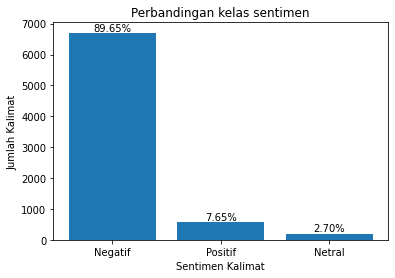

In [15]:
import matplotlib.pyplot as plt

# Menyiapkan data untuk plot
sentiments = ["Negatif", "Positif", "Netral"]
counts = [sentiment_counts["Negative"], sentiment_counts["Positive"], sentiment_counts["Neutral"]]

# Menghitung persentase untuk setiap kelas sentimen
total = sum(counts)
percentages = [count/total * 100 for count in counts]

# Membuat bar plot
plt.bar(sentiments, counts)

# Menambahkan keterangan nilai persentase di atas setiap batang
for i, count in enumerate(counts):
    plt.text(i, count, f"{percentages[i]:.2f}%", ha="center", va="bottom")

# Memberikan judul dan label sumbu pada plot
plt.title("Perbandingan kelas sentimen")
plt.xlabel("Sentimen Kalimat")
plt.ylabel("Jumlah Kalimat")

# Menampilkan plot
plt.show()


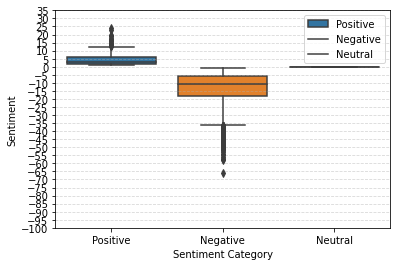

<Figure size 1440x864 with 0 Axes>

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('labeled.csv')

# Melakukan one-hot encoding pada kolom "sentiment_category"
dummy_vars = pd.get_dummies(df["sentiment_category"])

# Menggabungkan dummy variables dengan dataframe utama
df_encoded = pd.concat([df, dummy_vars], axis=1)

# Menggunakan kolom dummy untuk box plot
sns.boxplot(data=df_encoded, x="sentiment_category", y="sentiment")

# Memberikan label pada sumbu x dan y
plt.xlabel("Sentiment Category")
plt.ylabel("Sentiment")

# Membuat legenda
plt.legend(labels=["Positive", "Negative", "Neutral"])

# Menambahkan grid
plt.grid(True, axis="y", linestyle="--", alpha=0.5)

# Menampilkan box plot
plt.yticks(range(-100, 40 , 5))  # Menampilkan angka kelipatan 5 dari -50 hingga 50
plt.figure(figsize=(20, 12))
plt.show()


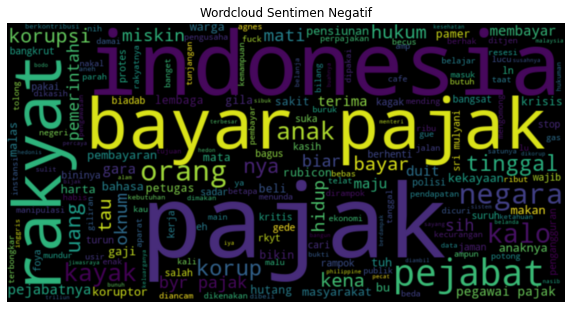

In [17]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Filter data sentimen negatif
df_negative = df[df['sentiment'] <=-40]

# Menggabungkan teks menjadi satu teks panjang
text_negative = ' '.join(df_negative['Word_After_Normalization_StopWords'])

# Membuat Wordcloud
wordcloud = WordCloud(width=800, height=400).generate(text_negative)

# Plot Wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis('off')
plt.title('Wordcloud Sentimen Negatif')
plt.show()


### Pembagian Data Set : 80% Data Latih & 20% Data Uji

In [18]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur (X) dan label (y)
X = data_labeled["Word_Stemmed"]
y = data_labeled["sentiment_category"]

# Membagi data menjadi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan jumlah data train dan data test
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))


Jumlah data train: 5984
Jumlah data test: 1496


## Ekstraksi Fitur TF-IDF

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi objek TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Menggunakan data train untuk fitting dan transformasi
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Menggunakan data test untuk transformasi
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Menampilkan dimensi matriks TF-IDF
print("Dimensi matriks TF-IDF (data train):", X_train_tfidf.shape)
print("Dimensi matriks TF-IDF (data test):", X_test_tfidf.shape)


Dimensi matriks TF-IDF (data train): (5984, 11719)
Dimensi matriks TF-IDF (data test): (1496, 11719)


In [34]:
# Mendapatkan daftar fitur setelah ekstraksi TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()

# Menampilkan jumlah fitur
print("Jumlah fitur setelah ekstraksi TF-IDF:", len(feature_names))

Jumlah fitur setelah ekstraksi TF-IDF: 11719


In [44]:
print("Teks yang menjadi fitur pada TF-IDF beserta indeks:")
for idx, feature in enumerate(feature_names):
    print(f"Indeks {idx}: {feature}")

Teks yang menjadi fitur pada TF-IDF beserta indeks:
Indeks 0: aaah
Indeks 1: aab
Indeks 2: aaja
Indeks 3: aas
Indeks 4: ab
Indeks 5: abad
Indeks 6: abadi
Indeks 7: abadnu
Indeks 8: abai
Indeks 9: abalabal
Indeks 10: abang
Indeks 11: abangda
Indeks 12: abby
Indeks 13: abcd
Indeks 14: abd
Indeks 15: abdi
Indeks 16: abdullah
Indeks 17: ability
Indeks 18: abis
Indeks 19: about
Indeks 20: abraham
Indeks 21: abrik
Indeks 22: absen
Indeks 23: absurd
Indeks 24: absuurdlha
Indeks 25: abu
Indeks 26: ac
Indeks 27: academy
Indeks 28: acak
Indeks 29: acakacakan
Indeks 30: acan
Indeks 31: acara
Indeks 32: account
Indeks 33: accounting
Indeks 34: accountnya
Indeks 35: accurate
Indeks 36: aceh
Indeks 37: acehjayamaju
Indeks 38: aco
Indeks 39: acting
Indeks 40: action
Indeks 41: acu
Indeks 42: acung
Indeks 43: ada
Indeks 44: adaapahariini
Indeks 45: adab
Indeks 46: adakalanya
Indeks 47: adakan
Indeks 48: adam
Indeks 49: adamana
Indeks 50: adan
Indeks 51: added
Indeks 52: additional
Indeks 53: adeeeh
In

Indeks 3276: gbp
Indeks 3277: gbpusd
Indeks 3278: gcvbiar
Indeks 3279: gdp
Indeks 3280: ge
Indeks 3281: geblek
Indeks 3282: gebukin
Indeks 3283: gede
Indeks 3284: gedek
Indeks 3285: gedhe
Indeks 3286: gedong
Indeks 3287: gedung
Indeks 3288: gegara
Indeks 3289: gegeden
Indeks 3290: geger
Indeks 3291: gelap
Indeks 3292: gelapin
Indeks 3293: gelar
Indeks 3294: geledah
Indeks 3295: geleng
Indeks 3296: gelimang
Indeks 3297: gelintir
Indeks 3298: gelisah
Indeks 3299: gelitik
Indeks 3300: gelo
Indeks 3301: gelombang
Indeks 3302: gelontor
Indeks 3303: gelora
Indeks 3304: gelut
Indeks 3305: gemah
Indeks 3306: gemar
Indeks 3307: gemas
Indeks 3308: gembar
Indeks 3309: gembel
Indeks 3310: gembira
Indeks 3311: gemblong
Indeks 3312: gembong
Indeks 3313: gembor
Indeks 3314: gembussss
Indeks 3315: gemeesssh
Indeks 3316: gemeteran
Indeks 3317: gemilang
Indeks 3318: gempa
Indeks 3319: gempar
Indeks 3320: gemplang
Indeks 3321: gempur
Indeks 3322: gemuk
Indeks 3323: gen
Indeks 3324: gencar
Indeks 3325: ge

Indeks 6662: modelling
Indeks 6663: moderator
Indeks 6664: moderensekarang
Indeks 6665: modern
Indeks 6666: modifikasi
Indeks 6667: modul
Indeks 6668: modus
Indeks 6669: mofdac
Indeks 6670: moga
Indeks 6671: moge
Indeks 6672: mogerubicon
Indeks 6673: mogok
Indeks 6674: mogokbayarpajak
Indeks 6675: mogot
Indeks 6676: mohamed
Indeks 6677: mohammad
Indeks 6678: mohmahfudmdkarana
Indeks 6679: mohon
Indeks 6680: mojokerto
Indeks 6681: mok
Indeks 6682: momen
Indeks 6683: momentnya
Indeks 6684: momentum
Indeks 6685: monarki
Indeks 6686: monas
Indeks 6687: mondar
Indeks 6688: moneter
Indeks 6689: money
Indeks 6690: monggo
Indeks 6691: monitor
Indeks 6692: monopoli
Indeks 6693: monorail
Indeks 6694: month
Indeks 6695: months
Indeks 6696: montok
Indeks 6697: monyet
Indeks 6698: monyong
Indeks 6699: moon
Indeks 6700: moral
Indeks 6701: moralcitra
Indeks 6702: moralitas
Indeks 6703: moralnyapercuma
Indeks 6704: more
Indeks 6705: moril
Indeks 6706: morning
Indeks 6707: morocco
Indeks 6708: morotin


Indeks 11242: upaya
Indeks 11243: upayahukum
Indeks 11244: update
Indeks 11245: updateny
Indeks 11246: updating
Indeks 11247: uperi
Indeks 11248: upeti
Indeks 11249: upetipajak
Indeks 11250: upgrade
Indeks 11251: upil
Indeks 11252: upload
Indeks 11253: uprak
Indeks 11254: uprit
Indeks 11255: upssssss
Indeks 11256: upt
Indeks 11257: uptd
Indeks 11258: uption
Indeks 11259: ur
Indeks 11260: urai
Indeks 11261: uras
Indeks 11262: urat
Indeks 11263: urgensi
Indeks 11264: urip
Indeks 11265: urun
Indeks 11266: urus
Indeks 11267: urusangue
Indeks 11268: urusizinreklame
Indeks 11269: urut
Indeks 11270: us
Indeks 11271: usah
Indeks 11272: usaha
Indeks 11273: usak
Indeks 11274: usd
Indeks 11275: usdusd
Indeks 11276: user
Indeks 11277: userstory
Indeks 11278: userstrory
Indeks 11279: usha
Indeks 11280: usia
Indeks 11281: usik
Indeks 11282: usir
Indeks 11283: uskup
Indeks 11284: ust
Indeks 11285: ustad
Indeks 11286: ustadz
Indeks 11287: ustat
Indeks 11288: usu
Indeks 11289: usul
Indeks 11290: usung


In [41]:

# Menghitung frekuensi kemunculan setiap kata dalam seluruh dokumen
total_word_counts = np.sum(X_train_tfidf.toarray(), axis=0)

# Membuat kamus berisi kata sebagai kunci dan frekuensi kemunculannya sebagai nilai
word_freq_dict = {word: total_word_counts[idx] for idx, word in enumerate(feature_names)}

# Mengurutkan kamus berdasarkan frekuensi kemunculan kata (dari yang paling sering)
sorted_word_freq = {k: v for k, v in sorted(word_freq_dict.items(), key=lambda item: item[1], reverse=True)}

# Menampilkan kata-kata ekstraksi yang paling sering muncul
print("Kata-kata ekstraksi yang paling sering muncul:")
for word, freq in sorted_word_freq.items():
    print(f"{word}: {freq}")

Kata-kata ekstraksi yang paling sering muncul:
pajak: 393.2400854969811
indonesia: 320.82616978761797
bayar: 223.4482835596596
rakyat: 166.11623053658695
orang: 117.85818604227805
negara: 117.62918298557798
ya: 110.0466516627036
uang: 105.12200120513037
jabat: 102.74513573444733
kalo: 99.15283048656926
pegawai: 97.56035903263746
tinggal: 93.20819229596889
kena: 73.89915274705021
wajib: 68.74626982294572
kayak: 67.68579884293881
nya: 66.54682537554223
hasil: 61.30195066528604
gaji: 61.154796014078784
lapor: 60.94493853486366
korupsi: 59.26073135533078
paja: 57.63739017271089
masyarakat: 56.29969971240014
anak: 53.46807998367382
sih: 52.914889559511366
negeri: 52.413929078284006
pakai: 51.48031838854729
masuk: 51.20865966589521
kerja: 51.088123736013664
amp: 50.69736104690524
warga: 50.200079754735185
bangun: 49.95950338599369
duit: 49.8109515867799
terima: 49.73939797814798
harga: 45.806237103439706
bea: 43.740040137583115
cukai: 43.64328661498466
taat: 43.62049073400754
usaha: 43.28173

user: 1.8152898721865307
ag: 1.8121634518668386
senin: 1.81022265849367
tenggara: 1.8098286802039452
psi: 1.8096220521993063
sembako: 1.8090691728701298
koreksi: 1.8085733230064711
fiskal: 1.807571059865356
ai: 1.8069120958680205
tokoh: 1.8056180307167027
meteor: 1.8029454801466893
itu: 1.802497909587216
pemerintahtegas: 1.8019960706418403
dividend: 1.8006236549574566
kelen: 1.7995081140729592
swiss: 1.7993090260789195
wacana: 1.7970791702090811
honda: 1.7968917787262058
price: 1.7960300934974427
kepo: 1.7943134356260637
aduh: 1.7930302194150824
sepatu: 1.7873695851254099
segi: 1.7863019665010405
minyak: 1.784514589247065
anshor: 1.7843489241841533
cnn: 1.7835844080713836
kecam: 1.7791317744431692
software: 1.7789053632777416
geger: 1.7762933065689
pikirin: 1.77594240928643
kelar: 1.7730378125110893
email: 1.7705770891220394
error: 1.7692852675942539
sadis: 1.7692294864054814
tindas: 1.768900650449479
calon: 1.7685587336226098
ongkos: 1.7658109106677458
tentara: 1.7652226695249325
manj

cctv: 0.49689306048730647
prawiranegara: 0.49682643511303365
sjafruddin: 0.49682643511303365
diembatpetugasnya: 0.49661058075441344
exo: 0.4964422780839979
shame: 0.49633692036144716
rate: 0.4963120405356426
menggilaaaaaaaa: 0.49624473730038793
semifinal: 0.496084368351972
predator: 0.4960104948660533
gemeteran: 0.4959694610661015
dengung: 0.4958531853858513
eun: 0.49574442306076283
kdm: 0.49574442306076283
moon: 0.49574442306076283
katanyaaa: 0.49533093458597427
tanps: 0.49533093458597427
amatttttttttttt: 0.49514915634320245
anteng: 0.4950992891708954
diawasin: 0.4950992891708954
kosakata: 0.49472953997698266
indonesiajadi: 0.49457981243735694
ustat: 0.49457981243735694
usung: 0.49444967454996824
pegawa: 0.4944097379725225
babi: 0.49407865398013356
okey: 0.49397024613308177
mie: 0.4938645243042543
raw: 0.49346235722397674
excludes: 0.4934142771368219
komedi: 0.4934142771368219
ngabisin: 0.4933960336216105
terkoruo: 0.4933960336216105
rebuuu: 0.493379935812472
waalaikum: 0.493258400503

tksarjo: 0.3010622108176148
bistrem: 0.3008646933196557
ung: 0.3008529319321613
cuap: 0.30081661099134127
ketenagakerjaan: 0.3008042908068218
pendayagunaan: 0.3008042908068218
cermin: 0.3007217971889872
duitnyapegawai: 0.3007217971889872
indonesiatp: 0.3007217971889872
pajakyukkita: 0.3007217971889872
rakyatnyaapa: 0.3007217971889872
goblognya: 0.30047068106541314
autodebet: 0.30036920771802905
caption: 0.30024152318427694
gengs: 0.30024152318427694
instastrory: 0.30024152318427694
introvert: 0.30024152318427694
rubicorn: 0.30024152318427694
mukjizat: 0.3001696228262815
olshop: 0.3001696228262815
speknya: 0.3001696228262815
thanks: 0.3001696228262815
anjirrrrr: 0.3001689755939536
baangettttt: 0.3001689755939536
sumpahhhhh: 0.3001689755939536
gub: 0.30013343545591614
masyarakatasn: 0.3001124950244021
responsif: 0.3001124950244021
braninya: 0.30007750199632405
ketang: 0.30007750199632405
binasa: 0.300054336537765
bny: 0.300054336537765
milayaran: 0.300054336537765
rupeah: 0.3000543365377

In [43]:
# Menampilkan kata-kata ekstraksi yang paling sering muncul dan nilai ekstraksi TF-IDF nya
print("Kata-kata ekstraksi yang paling sering muncul dan nilai ekstraksi TF-IDF nya:")
for word, freq in sorted_word_freq.items():
    print(f"{word}: {freq}")
    # Mencari indeks fitur dalam matriks TF-IDF berdasarkan nama kata
    feature_idx = np.where(feature_names == word)[0][0]
    # Memperoleh nilai ekstraksi TF-IDF dari matriks untuk kata tersebut
    tfidf_value = X_train_tfidf[:, feature_idx].toarray().squeeze()
    print("Nilai ekstraksi TF-IDF:", tfidf_value)

Kata-kata ekstraksi yang paling sering muncul dan nilai ekstraksi TF-IDF nya:
pajak: 393.2400854969811
Nilai ekstraksi TF-IDF: [0.07385164 0.03997035 0.06321682 ... 0.11979387 0.         0.08515234]
indonesia: 320.82616978761797
Nilai ekstraksi TF-IDF: [0.         0.         0.12805782 ... 0.06066637 0.02182105 0.04312311]
bayar: 223.4482835596596
Nilai ekstraksi TF-IDF: [0.         0.         0.         ... 0.12486572 0.         0.        ]
rakyat: 166.11623053658695
Nilai ekstraksi TF-IDF: [0.         0.         0.         ... 0.         0.         0.10780378]
orang: 117.85818604227805
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
negara: 117.62918298557798
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ya: 110.0466516627036
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
uang: 105.12200120513037
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
jabat: 102.74513573444733
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kalo: 99.15283048656926
Nilai ekstraksi TF-IDF: [0.         0.   

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
lihat: 19.563292535199903
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
iya: 19.403223977798493
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
raya: 19.358120477449248
Nilai ekstraksi TF-IDF: [0.         0.         0.         ... 0.         0.         0.20465686]
jenderal: 19.353645593543675
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
mah: 19.282188359581667
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
hitung: 19.068712652774717
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
direktorat: 19.034346094930225
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
usir: 18.96640743787732
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pas: 18.81027765083824
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
uu: 18.69501279091838
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ayo: 18.569210716783196
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
polisi: 18.48280751020841
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kelola: 18.335500274440

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
stop: 12.214205652679235
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
karyawan: 12.192049555942882
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
include: 12.15715199457693
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kakak: 12.147706987922867
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
investasi: 12.147350889574495
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bahasa: 12.144386415406126
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
dasar: 12.100299185353094
Nilai ekstraksi TF-IDF: [0.         0.20517716 0.         ... 0.         0.         0.        ]
bang: 12.097792793238957
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
badan: 12.089372312912078
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
guna: 12.078914047609782
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
maaf: 12.071873833716394
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pulang: 12.056238660707216
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
satu: 12.0

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
platform: 8.657304496431273
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ri: 8.646588575372046
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ikn: 8.645415040184233
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bodoh: 8.639477455931992
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
wilayah: 8.617652985386142
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
haram: 8.59695992652497
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
tagih: 8.592697543616676
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bidang: 8.591734086788321
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bangsat: 8.552900408931265
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bisnis: 8.538118408612384
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
aniaya: 8.520620620079958
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
hadiah: 8.512812466937307
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
obat: 8.505407362176733
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
keluar: 6.1616638455210175
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pengaruh: 6.159959948502625
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
petinggi: 6.154238721094879
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bro: 6.154148396466533
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ngutang: 6.1224619430935565
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
beasiswa: 6.121030530939902
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
rupiah: 6.11816480512544
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
anies: 6.111972093478784
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
mampu: 6.10101536403493
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
dokumen: 6.091491551459129
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
benar: 6.082606576899854
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
muncul: 6.0809221647718585
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
polri: 6.079427246779479
Nilai ekstraksi TF-IDF: [0. 0. 0. ..

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
berantas: 5.032715389489639
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
cabut: 5.0325796776935805
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
you: 5.032438191122729
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
lepas: 5.032165449720547
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
integritas: 5.031993451605242
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
modal: 5.0302745399466335
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
tolak: 5.030145199223147
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
wkwkwkwk: 5.024181592984335
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
lari: 5.015046012835521
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
babu: 5.014354104036208
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bulan: 5.011253623019696
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
yoongi: 5.0000029255775305
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
internal: 4.9870081543551885
Nilai ekstraksi TF-IDF: [0. 0. 0. ..

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kesel: 4.117435187939862
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
twitter: 4.114776564761386
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sasar: 4.112612412280665
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
nyaman: 4.112538710132168
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
gubernur: 4.111040842933667
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
luas: 4.106754601426665
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
darurat: 4.102731590391091
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
rekam: 4.09370037860031
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
seleweng: 4.089845342294618
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
posisi: 4.087578125072544
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
dalem: 4.077650384973959
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
berkat: 4.075839916981313
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
curi: 4.067164665976312
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
radikal: 3.4788173549468713
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
jawab: 3.4655744962937134
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
patut: 3.4649624902185754
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
google: 3.464847760264059
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pabean: 3.463218940072924
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kawal: 3.4600818384430534
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
alhamdulillah: 3.460057436404008
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
setan: 3.456348411397286
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
alkes: 3.4464834522028123
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
jaya: 3.4443354140552285
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
rutin: 3.441850160206789
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
belanda: 3.4379745941598143
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
standar: 3.4376141173267674
Nilai ekstraksi TF-IDF: [0. 

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pajakbuatpembangunan: 2.864073352137893
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
garis: 2.854729940481043
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
woi: 2.8521731756277484
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
asean: 2.8482081960254226
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
melarat: 2.844873459442539
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
lakalantas: 2.8420454008648104
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
instrumen: 2.8415647155444788
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
rang: 2.839983502016
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kriteria: 2.8397103883262518
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
universitas: 2.835278456622543
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sdm: 2.835201653532463
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
detail: 2.8338794988667075
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
seram: 2.8316443356668506
Nilai ekstraksi 

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
simpul: 2.3367627805259072
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
tidur: 2.334718260895769
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
depkeu: 2.3341038407622383
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
acu: 2.332820440813571
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
artikel: 2.331045445342859
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
demokrasi: 2.329727123313055
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
medsos: 2.329458630866747
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
garagara: 2.3290556493571515
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
humas: 2.3288439505649405
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pj: 2.3276333295212277
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ayam: 2.3259899409984923
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
asosiasi: 2.3240962040039608
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
konsekuensi: 2.323399228906636
Nilai ekstraksi TF-IDF: [0. 0

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
gelimang: 2.0291021414443158
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
uangkita: 2.028173059836762
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kadrun: 2.0280657553652452
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
export: 2.024089572908523
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
titip: 2.022452797380217
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
tegas: 2.0203440202380314
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kpop: 2.0195452023777287
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
gempar: 2.0181116678760302
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
defisit: 2.01799323837377
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
peringkat: 2.01662367086988
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
becuk: 2.0142982693274964
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
akbar: 2.009391107949611
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
tweet: 2.004812001749033
Nilai ekstraksi TF-IDF: [0. 0. 0.

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kecam: 1.7791317744431692
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
software: 1.7789053632777416
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
geger: 1.7762933065689
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pikirin: 1.77594240928643
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kelar: 1.7730378125110893
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
email: 1.7705770891220394
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
error: 1.7692852675942539
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sadis: 1.7692294864054814
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
tindas: 1.768900650449479
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
calon: 1.7685587336226098
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ongkos: 1.7658109106677458
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
tentara: 1.7652226695249325
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
manja: 1.7625665914881115
Nilai ekstraksi TF-IDF: [0. 0. 0. .

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
vat: 1.5939453630633387
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
hikmah: 1.592963114494324
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bandung: 1.5922453037401478
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ii: 1.5922117000700826
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
istimewa: 1.5914132450120404
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
open: 1.5913828286082659
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
gerogot: 1.5892603372076886
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
web: 1.5877823299848255
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
patok: 1.5873381672227884
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
hei: 1.5862841463946074
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
etis: 1.584405474335333
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
balap: 1.582558320938555
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
tema: 1.5800067950647467
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pahit: 1.4490638080594085
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
browser: 1.4470470341398827
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
thd: 1.4455393910191665
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
welcome: 1.4446437356667203
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ora: 1.443844445774554
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
babak: 1.4412475494290304
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
matere: 1.4406526362977492
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
serbu: 1.4389340803988655
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
good: 1.4387856238639123
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
importir: 1.4384675541165053
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
komoditas: 1.4381222659309136
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
siapsiap: 1.4366828900548874
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
korupsikronisdirjenpajak: 1.435169083245945
Nilai ekstr

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pki: 1.351654263977037
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
intip: 1.3501973753795702
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
iring: 1.3500052707403132
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
gais: 1.3498326098955609
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
puja: 1.3486635472443071
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
shg: 1.3478156780838735
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pesta: 1.3474451650648782
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pkb: 1.3457004943068256
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kisruh: 1.3454251452154378
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
jarak: 1.3451197183703902
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
mineral: 1.3450985872427403
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kesini: 1.3428113814769715
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
itungannya: 1.3421529314009066
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
susu: 1.21827335233782
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
birokrat: 1.2181283734828783
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
rinci: 1.2161021843537692
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bursok: 1.2159222096823594
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
himbauan: 1.215767269245344
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
saldo: 1.2145694737485446
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
rapat: 1.2145438930584112
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
rejim: 1.2128831248957659
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
materi: 1.2120962078063302
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
curut: 1.210475806569283
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
orisinal: 1.2094984141033833
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
dirjend: 1.2086653532095788
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
makhluk: 1.2079946471765814
Nilai ekstraksi TF-IDF: [0. 

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pras: 1.0701050920943178
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
berfoyafoya: 1.0700380332206494
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ngebongkar: 1.0699823119397536
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bekal: 1.06991594086068
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
menkopolhukam: 1.0698659815536322
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
enih: 1.0692708726342726
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
wak: 1.0689321078767855
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
cuit: 1.068707530749427
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
dear: 1.0682883273189785
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
indra: 1.0668454854949188
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
barangkali: 1.0665635117464902
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
memek: 1.0643793424599055
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
rejeki: 1.0642002548758176
Nilai ekstraksi TF-IDF

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
format: 0.9920453235294733
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
spek: 0.9911521560339835
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
premium: 0.9907201642735854
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
isap: 0.9902162969939428
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
oknumoknum: 0.9896518417190809
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
metro: 0.9895068354601743
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
dikitdikit: 0.9888291271727028
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
rasisme: 0.9879552793342179
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
now: 0.9879487256915369
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
va: 0.987774213775214
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
blunder: 0.9875706410715361
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
harto: 0.987550879359012
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
that: 0.9869650869156447
Nilai ekstraksi TF-IDF: [0. 0. 

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
value: 0.9158875350540473
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
iris: 0.9158082025247083
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bendahara: 0.9157266630899573
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sunat: 0.9153723035952617
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
warganegara: 0.9150117451123789
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
idol: 0.9144896047051818
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sekjen: 0.9144675643181923
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
yakan: 0.9143402674792014
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bni: 0.9143389514907293
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
capital: 0.9141538072481533
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
gain: 0.9141538072481533
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
budget: 0.9126265468712537
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
tabrak: 0.9121707090854684
Nilai ekstraksi TF-IDF: [0. 

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
extra: 0.8735417752421419
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ngepost: 0.8732965204128815
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
issue: 0.872673368355857
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sisih: 0.8726352289898212
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
dongeng: 0.872614757778202
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
himpun: 0.8724261854025863
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ekspedisi: 0.8723565712581017
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
resi: 0.8710004611193478
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kitas: 0.8708127687142498
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
hura: 0.8699638112917109
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kekayaanya: 0.8697817324536168
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
feodal: 0.8697173430466073
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
satria: 0.8696374333424428
Nilai ekstraksi TF-IDF: [0

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
fangoria: 0.8219683571644605
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
majalah: 0.8219683571644605
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
setinggi: 0.8212500560296403
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
dongkrak: 0.8211540328380408
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
digabungin: 0.8208541244202876
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
puruk: 0.8202902225216167
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sesak: 0.8198711291886813
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
aud: 0.819183816849856
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ecommerce: 0.8190410571787425
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
relatif: 0.8189245960540688
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pajakternyata: 0.8188233918404628
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
antre: 0.8184936856127676
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
basalamah: 0.8183984497318126
Nilai e

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
taipan: 0.7773411963872328
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
platfrom: 0.7770991280255941
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
oi: 0.7770325000304392
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bersihin: 0.7769671335435064
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
perush: 0.7768950268915097
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
true: 0.7768012461500163
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
panggung: 0.7766800645186693
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
why: 0.7763047291176832
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
mjb: 0.7761355629222016
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
fan: 0.7759767958320071
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
siswasiswi: 0.7754099516059592
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
woah: 0.7743200310490249
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
part: 0.7740773728510512
Nilai ekstraksi TF-IDF: [0. 0. 0. 

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
fatwapagi: 0.7257519914261987
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
lngs: 0.7252800560180812
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
nangkap: 0.7251845317752404
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
nelayan: 0.7250902709909076
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
power: 0.7250528542322849
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
txtfrombennix: 0.7243682139573635
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ustad: 0.7241045617679932
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
tldr: 0.7240844287382691
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
selagi: 0.7232850774842314
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
statemen: 0.7231656623194329
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
lekat: 0.7230768981851504
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
amaaaaaat: 0.7225502203909189
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sawang: 0.7222566666440797
Nilai ekstraksi

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
golput: 0.6915523918714241
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
didlm: 0.6914125264553457
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
hpnya: 0.6913439522682165
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
gab: 0.6912572493096266
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ekspatriat: 0.6910911871452963
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pejabrut: 0.6907580512227558
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
public: 0.6907261836701408
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
lowongankerja: 0.6903797772820391
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
nes: 0.6903785419967727
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
divisi: 0.6899786817583751
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
terimakasihtembakau: 0.6894833654008838
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
orangx: 0.6892350996161298
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
stadion: 0.6889406297980978
Nilai 

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
laporpajakhariini: 0.6666127299365436
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ganjar: 0.6665150835076632
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
parlemen: 0.666458594722452
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
heheh: 0.6662191893378622
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
lantak: 0.6661229965606963
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bangetcoba: 0.6659905512476075
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
headphone: 0.6653548506082965
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
aula: 0.6645031293834863
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
nyicil: 0.6643742578690768
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
transaksional: 0.6641493792844049
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
lupaefin: 0.6640290018614023
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
love: 0.6640215276411446
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sulsel: 0.663751998480824
Nil

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
infaq: 0.6424698707491854
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sjw: 0.6423022836361344
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
dibagibagi: 0.6421952665094719
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
korting: 0.6421952665094719
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
lawyers: 0.6421952665094719
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
mnya: 0.6421952665094719
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
psk: 0.6421842153562268
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
jebak: 0.6419671043016519
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
menilep: 0.6413832483557556
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
alihalih: 0.6413643005853775
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
mntri: 0.641217538565992
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bendera: 0.6412119617320924
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bridgestone: 0.6411982849482754
Nilai ekstraksi TF-IDF

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
tkstnti: 0.6208752266922264
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
rizal: 0.6207547205785555
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
unand: 0.6205533821996357
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
mampus: 0.6201885130975303
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
gr: 0.6193915067265333
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
drdl: 0.6192415280216504
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
panting: 0.6191363418309066
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
suratsurat: 0.6190582462292704
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
mainpotensi: 0.6190443391613234
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
daging: 0.6189618490631044
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
caci: 0.6179141242222785
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
beramairamai: 0.6177972157301845
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
opsi: 0.6177545370224957
Nilai ekstraksi TF-I

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
office: 0.5992204684091287
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
texas: 0.59908118795471
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
carbon: 0.5985818884974543
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bina: 0.5984550972351963
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bias: 0.5983860915143604
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kadroenz: 0.5983860915143604
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
laju: 0.5983860915143604
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
garansi: 0.5983102982590667
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
astaghfirullahaladziim: 0.5982560710614541
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
najis: 0.5981744596726648
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
circle: 0.5979712441427425
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
elemen: 0.5977502484807353
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
apasih: 0.5975384013066296
Nilai ekstraksi 

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
snack: 0.5810325466672172
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
yunani: 0.5810117309359812
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pengahasilan: 0.5810020659019113
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
memporak: 0.5809294649371248
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
porandakan: 0.5809294649371248
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
djki: 0.5808458619047133
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bbmtdlpajakharga: 0.5807157975394297
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kebutuhannaik: 0.5807157975394297
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
menporapolisi: 0.5807157975394297
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
mensos: 0.5807157975394297
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
krl: 0.5805091730965606
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kyai: 0.579966635275152
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kawaldavid: 0.57983485660

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
systemnya: 0.5657191577541123
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kencang: 0.5651501081576064
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
tres: 0.5649811179680972
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
client: 0.5647994739857225
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
scam: 0.5647246679958704
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
efficient: 0.564659763851578
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sugih: 0.564507128805475
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ngetwit: 0.5645017793405879
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
jasfren: 0.5644856146264116
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
maav: 0.5644089818564562
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
konstitusi: 0.5643644032607862
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
insan: 0.5640986480892751
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
mbokde: 0.5637134847769503
Nilai ekstraksi TF-IDF

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
productions: 0.5436388341834975
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
perkeretaapian: 0.543554395972348
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
fed: 0.5435465932204001
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
hadeuhh: 0.5435455733366849
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sunny: 0.5434688524126216
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
situasiapaan: 0.5434196886942025
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
banner: 0.5434119064247903
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kabupatenkota: 0.5434119064247903
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ina: 0.5434057475696142
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sirkuit: 0.5431974400783014
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
control: 0.5430847149201015
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
gendong: 0.5426739709382935
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
dirjennya: 0.5425554052760925


Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
iven: 0.5193576807008784
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
people: 0.5192895108242306
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
rapu: 0.5188355085554495
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
padat: 0.5187082486313582
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
building: 0.5186738220262342
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
capacity: 0.5186738220262342
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
tengara: 0.5186458940418169
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
seatoday: 0.5185580401186725
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
seatodaynews: 0.5185580401186725
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bingun: 0.5184452672488973
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
dibandingin: 0.5183846511868527
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
malasini: 0.5183676329468059
Nilai ekstraksi TF-IDF: [0.         0.         0.51836763 ... 0.         0.         0

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
antem: 0.5060689017036651
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
paguyuban: 0.5059982095716519
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sekuler: 0.5057919189920628
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
nyumbang: 0.5057220715651178
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sosok: 0.5056774657811429
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
anjenggg: 0.5056561595814795
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
masif: 0.5053351654842175
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pricelist: 0.5052806061241728
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
indonesiasebab: 0.50524307498854
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kalianmeskipun: 0.50524307498854
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
hindia: 0.5050844465422222
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kurleb: 0.5050503320605196
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
masyarakt: 0.5050276637309554
Ni

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
indonesiakutil: 0.48776616482301827
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
benner: 0.4876303216803605
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bajingann: 0.4874879122765443
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
dangkal: 0.4873766197536534
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
njalanin: 0.4873766197536534
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
msyrkt: 0.4872451252021864
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
tegass: 0.48718401650625426
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
permasalahin: 0.4866566120215831
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bsr: 0.48649482668596167
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kuvukilan: 0.4864516145502982
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
olot: 0.4864516145502982
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
three: 0.48642099795766175
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
interest: 0.4863045709332186
Ni

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
republikindonesia: 0.4722401246624847
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
wadah: 0.47216357106530654
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ancangancang: 0.47211799504656576
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
medioker: 0.4720391523292635
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
remahremahnya: 0.4720391523292635
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
teuing: 0.4720005580816544
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bangkitbenarkah: 0.4717848057550306
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
happinessformashiho: 0.4717848057550306
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
jibun: 0.4717041352223775
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kurung: 0.47157018648153814
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
policy: 0.471484742134695
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
imbreklame: 0.47130350411370925
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ngempanin: 0.4630640294542369
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pajakeh: 0.4630640294542369
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
apkah: 0.46294828413896927
Nilai ekstraksi TF-IDF: [0.         0.         0.         ... 0.         0.16870426 0.        ]
habib: 0.4627632263208917
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
xxi: 0.46259832503788245
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ditileb: 0.4625531732060658
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
tikustikus: 0.462424341073982
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
getah: 0.46230026546297026
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
novasi: 0.46226574360816575
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
mandir: 0.462110131939493
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
mondar: 0.462110131939493
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
gnajar: 0.4620415921785785
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]


Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
luput: 0.45077244094081076
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
temankeu: 0.45077244094081076
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
xixixi: 0.45076775210882103
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
lamp: 0.450767131189611
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
berahlak: 0.4507546553551678
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
berhutangitulah: 0.4507546553551678
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
wayv: 0.45063883792301446
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ditjenpajakri: 0.45063328280069587
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
beacukaimakinbaik: 0.4503706470925266
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
tksimah: 0.45036402682581533
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
tksyndi: 0.45036402682581533
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
suluruh: 0.4502793235799457
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
gaessss: 0.450147

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
maksimalakan: 0.43595779770389614
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
disosmed: 0.4358674419741584
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
percm: 0.4358674419741584
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kpbpb: 0.43566044255360015
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
national: 0.43566044255360015
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ppbj: 0.43566044255360015
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sinsw: 0.43566044255360015
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
window: 0.43566044255360015
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
hgu: 0.4354025196009097
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
til: 0.43516995421431626
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sms: 0.43514524196942383
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bultang: 0.4351048608619093
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
gegeden: 0.4349240199834913
Nilai ekstraksi TF-

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
suri: 0.41580840863205154
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
omonganya: 0.4157866274387183
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
persilahkam: 0.4157866274387183
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
mitsubishi: 0.41570899481987245
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
indonesiaberantasmafiapajak: 0.41569195556783706
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
semayam: 0.41569195556783706
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
akripto: 0.4150365856291131
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
jisoo: 0.4150365856291131
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
puny: 0.4150365856291131
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
polah: 0.4149312485120412
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
selukbeluk: 0.4149312485120412
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
help: 0.41488002394720636
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
tama: 0.41486361

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
rg: 0.40217998163298097
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
azas: 0.40210983031398473
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
keselek: 0.40192394449806795
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ajausulmu: 0.4019238881686075
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
palestin: 0.4019238881686075
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
zon: 0.4019238881686075
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
asbun: 0.40186302137770147
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
crosscek: 0.4016690717057995
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
europa: 0.4016364414398384
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
konfimasi: 0.4014336209733259
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
mempan: 0.4014008696824046
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
eko: 0.4013009806520384
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
lapkerja: 0.4013009806520384
Nilai ekstraksi TF-ID

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
olimpiadeasean: 0.39077956256192886
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
odol: 0.39074673516214825
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sampo: 0.39074673516214825
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bujgn: 0.39068616638338205
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
disintregasi: 0.39068616638338205
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
diusirmau: 0.39068616638338205
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pajakusir: 0.39068616638338205
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
minoritas: 0.39062314889253685
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
mido: 0.39055620856549156
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
brow: 0.3904932529342524
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
jati: 0.39013921837444593
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
theft: 0.39013921837444593
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sangpeternak: 0.3899248190832

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ketapang: 0.37813728703188304
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
gosak: 0.3779744252518826
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
cuuukkk: 0.37796195484121375
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kwi: 0.37796195484121375
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pajakdancuuukkk: 0.37796195484121375
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
petak: 0.3778796357589746
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
umpat: 0.3778796357589746
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
tksibhb: 0.3775437078817453
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ngadepin: 0.3775427952650621
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
swktu: 0.3775427952650621
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
trpuruk: 0.3775427952650621
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
citacitanya: 0.37748023028844957
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
dna: 0.37739458340514725
Nilai ek

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
tirlyun: 0.36897583160794534
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
cola: 0.368893738815747
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
asingaseng: 0.36888889348661386
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
diserahin: 0.36888889348661386
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
binsar: 0.36881851966954465
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
fasum: 0.3686987753863807
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
gorden: 0.3686987753863807
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
staquf: 0.3684834489642207
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
yahya: 0.3684834489642207
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
malubahkan: 0.36846880613383365
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
rakyathebatnya: 0.36846880613383365
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
log: 0.3683517772039556
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
macam: 0.36831415228327097
Nilai e

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sikit: 0.3625541632599422
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
gaess: 0.3624744677814474
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bapa: 0.3622263290082953
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pedo: 0.3622263290082953
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
mrkutk: 0.36219814477316803
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
rytnya: 0.36219814477316803
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ngundurin: 0.3621340132504796
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pamerin: 0.3621340132504796
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pegaeai: 0.3620046041173832
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pendora: 0.3620046041173832
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pukat: 0.36199366929951005
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
son: 0.36199366929951005
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
uangpajakuntukpejabat: 0.361975521330531
Nilai ekstr

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pat: 0.3539401911940884
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
rendahpetugas: 0.3539401911940884
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
wpbiar: 0.3539401911940884
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
gofood: 0.35377979888968314
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
hewan: 0.3537575089461066
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
mnrt: 0.3536648765134415
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
tunjukkin: 0.3536648765134415
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bisabisa: 0.3536552991236674
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kliatannya: 0.3536552991236674
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kasinokasino: 0.3535843135045908
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
mampir: 0.35349823055426804
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
goda: 0.3534932097774477
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
believe: 0.35345987688177866
Nilai e

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
milyarder: 0.3480230014458139
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
uyoh: 0.3480230014458139
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ngopingopi: 0.34781657269613364
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
tksitri: 0.3478077934652641
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
artist: 0.34778957914929154
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
artprint: 0.34778957914929154
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ditandatangani: 0.34778957914929154
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
gallery: 0.34778957914929154
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
project: 0.34778957914929154
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
proof: 0.34778957914929154
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
dapt: 0.34776478482976536
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kknya: 0.34766675914467027
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
getol: 0.3475810228154456
Nil

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
lagimalah: 0.3396182379040518
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
nyumberterisi: 0.3396182379040518
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
tenteram: 0.33961062792050695
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
dandi: 0.33951229673439104
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
mudik: 0.339477282272387
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
nervous: 0.339477282272387
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
tl: 0.339477282272387
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
boros: 0.33943880880360144
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
shrsnya: 0.33943880880360144
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
morotin: 0.33943017490256183
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
butterfly: 0.339385920001216
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
dilakuin: 0.339385920001216
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
effect: 0.339385920001216
Nilai ekstrak

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
wjwkwk: 0.3352826795940111
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
fiskalmoneter: 0.3351334771016862
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
motormobil: 0.33513169566523515
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
mdhan: 0.3351065788246793
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
aleg: 0.33503947763250463
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
klienn: 0.33503947763250463
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
btki: 0.3350159261708735
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
indonesiakalian: 0.3349704845866677
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kaliandan: 0.3349704845866677
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kpkkenaprank: 0.3349150465533863
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pajakmau: 0.3349067769637541
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
palsuuntuk: 0.3349067769637541
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
wibawa: 0.334906776

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kabin: 0.32997426002557745
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
rakyataturan: 0.32997426002557745
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
geledah: 0.32970699818858856
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
piracy: 0.3296382671343678
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sobatkominfokebumen: 0.3295961239227842
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
baduo: 0.3294991914701903
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bulanpasti: 0.3294991914701903
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
dapek: 0.3294991914701903
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
klepek: 0.3294991914701903
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
nyokok: 0.3294991914701903
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sen: 0.3294991914701903
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
menpera: 0.3293808971917538
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
siswono: 0.3293808971917538
Ni

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ronda: 0.32580725316936593
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
siskamling: 0.32580725316936593
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ajaib: 0.3257387268357972
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
nan: 0.3257387268357972
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kuliahkerja: 0.3257360600752244
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
perkakas: 0.3257360600752244
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
petugasnyq: 0.32572072648392103
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
andy: 0.3254724621205368
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kick: 0.3254724621205368
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
indonesialuar: 0.32546580967888944
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
konsumsimenambah: 0.32546580967888944
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
juha: 0.32530758686283834
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
tetrndus: 0.3253075868628

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
orqng: 0.3217555751421071
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
akomodasi: 0.3217484495119183
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
nang: 0.3217484495119183
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
plexing: 0.32165447850736806
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bubarkanbawaslu: 0.32152723269108746
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
retwet: 0.32152723269108746
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
alfa: 0.3215228961273179
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
dikirm: 0.3215228961273179
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
indomaret: 0.3215228961273179
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
audisi: 0.32136186794287175
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ever: 0.32136186794287175
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
funniest: 0.32136186794287175
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
happenedkejadian: 0.321361867942871

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
yogya: 0.31780135676717014
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
cleaning: 0.31777010972321623
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pantes: 0.31777010972321623
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
zmaan: 0.3177009071429338
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
jmn: 0.3176720901852857
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sht: 0.3176720901852857
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
terjadikenapa: 0.3176720901852857
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
solve: 0.31767089911442614
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
spal: 0.3175253948464955
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ganjal: 0.3172321095508636
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pusar: 0.3172321095508636
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
namanama: 0.31714781998375746
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
penguasaha: 0.31714781998375746
Nilai ekstraksi 

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
nyudutin: 0.31191080258962445
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sum: 0.31191080258962445
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
walat: 0.31191080258962445
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
hnr: 0.3118707012647802
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
snk: 0.3118707012647802
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
lautperkebunankehutananpertambanganpengelolaan: 0.31186379180249957
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
negarapariwisata: 0.31186379180249957
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
abalabal: 0.3118427235604435
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
segerajika: 0.3118427235604435
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
iims: 0.3118375356682241
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
tdknya: 0.3116635322428565
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
trg: 0.3116635322428565
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
nder

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
undertable: 0.3084680741573968
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bodokayak: 0.3084465429998977
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
gpki: 0.3084465429998977
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
dinaikkangila: 0.3084422513276125
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kabupatenklo: 0.3084422513276125
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kedai: 0.3084422513276125
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
segitucoba: 0.3084422513276125
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
benarbenar: 0.3083721641152716
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ppnya: 0.3083721641152716
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
production: 0.3083721641152716
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
myzgarage: 0.3083671786459308
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
negotiable: 0.3083671786459308
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sunmori: 0.308367

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
wtf: 0.3049922350726408
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bieb: 0.30475802025231913
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
food: 0.3047280778957286
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
waste: 0.3047280778957286
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
beting: 0.3046506431941788
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
iniuntuk: 0.3046506431941788
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
klenbiar: 0.3046506431941788
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
oojdi: 0.3046506431941788
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
silap: 0.3046506431941788
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
yayaya: 0.3046506431941788
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
inimending: 0.30464624420236164
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
piral: 0.30464624420236164
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
wooy: 0.3046065293391834
Nilai ekstraksi TF-IDF: [0.

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
instastrory: 0.30024152318427694
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
introvert: 0.30024152318427694
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
rubicorn: 0.30024152318427694
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
mukjizat: 0.3001696228262815
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
olshop: 0.3001696228262815
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
speknya: 0.3001696228262815
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
thanks: 0.3001696228262815
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
anjirrrrr: 0.3001689755939536
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
baangettttt: 0.3001689755939536
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sumpahhhhh: 0.3001689755939536
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
gub: 0.30013343545591614
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
masyarakatasn: 0.3001124950244021
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
responsif: 0.300112

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
polresjember: 0.2958375944394285
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
redup: 0.2958101868392064
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
nas: 0.29579290588517776
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
visaampperpajakan: 0.29579290588517776
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
dsbnya: 0.29568470300509736
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
adan: 0.29549108727459644
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bei: 0.29549108727459644
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
banyal: 0.29544725162686625
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
dllbukannya: 0.29544725162686625
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
idealis: 0.29544725162686625
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
taxpayers: 0.29544725162686625
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
gala: 0.29518458129112907
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
cringe: 0.295181942201865
N

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
defund: 0.292252035711867
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
nita: 0.292252035711867
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ontrack: 0.292252035711867
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
tksting: 0.29220891338776456
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bim: 0.29216644532375036
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
lgsng: 0.29216644532375036
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
overseas: 0.29216644532375036
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
return: 0.29216644532375036
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
salabim: 0.29216644532375036
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
failing: 0.29216269391311667
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
dolok: 0.2920981859480095
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sanggul: 0.2920981859480095
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sijamapolang: 0.2920981859480095
Nilai ekstraksi

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
rbcn: 0.28840624865450704
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
suksme: 0.28840624865450704
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
anyar: 0.2883666948854581
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ayopajak: 0.2883666948854581
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
rahajeng: 0.2883666948854581
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
rahina: 0.2883666948854581
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
warsa: 0.2883666948854581
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kenda: 0.28833262112268354
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ambruk: 0.288264051653218
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
beloon: 0.288264051653218
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
garuk: 0.288264051653218
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
mukmuk: 0.288264051653218
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
airsoft: 0.28804162347127815
Nilai ekstraksi TF-IDF: [0

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
dipriksa: 0.28527073563987665
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ketidakwajaran: 0.28527073563987665
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
tksadhn: 0.2852533138984607
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
brbagai: 0.2851767007901444
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
hrganya: 0.2851767007901444
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kmpulkn: 0.2851767007901444
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
mercy: 0.2851767007901444
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pagoda: 0.2851767007901444
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ajatransaksi: 0.2851178118345916
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
aptika: 0.28486228731909274
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kemkominfo: 0.28486228731909274
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
iman: 0.2848552751734135
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
inihrsnya: 0.28485385780870

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ebliethos: 0.2798862739398581
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
lokerjogja: 0.2798862739398581
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
lowongankerjajogja: 0.2798862739398581
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bsar: 0.2798820751071085
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
msing: 0.2798820751071085
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ngra: 0.2798820751071085
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sobatlapor: 0.2798809790339212
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
spts: 0.2798809790339212
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
adib: 0.2798562695327101
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
khumaidi: 0.2798562695327101
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kiky: 0.2798562695327101
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
saputri: 0.2798562695327101
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
soekarnoputri: 0.27975554039864525
Ni

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
liye: 0.27503305496586866
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
tere: 0.27503305496586866
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
angggaran: 0.2749637257563695
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ciptaker: 0.2749311269611491
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
shu: 0.2749311269611491
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
feminist: 0.2747805235066579
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
imingiming: 0.2747805235066579
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pantat: 0.2747805235066579
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
keuangangubernur: 0.27467381484519665
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bikang: 0.2744179237307121
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
indosurya: 0.2744179237307121
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
expats: 0.2744136264468582
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
cultureujung: 0.2743867289837112

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
mengglorifikasi: 0.2695568027349243
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sorai: 0.2695568027349243
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ajamaaf: 0.26952143533555795
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
inggrisindonesia: 0.26952143533555795
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
parno: 0.26952143533555795
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bapenda: 0.26946053905973516
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
buay: 0.26946053905973516
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
muaradua: 0.26946053905973516
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
tokopediagojek: 0.2694120434575969
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
wukirsari: 0.2694120434575969
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kenap: 0.2692763604020034
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
mintain: 0.2692614763920572
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
jo: 0.2690863161

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
dls: 0.2647758577357438
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
first: 0.2647758577357438
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
runah: 0.2647758577357438
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
fokusterkini: 0.26472842504602556
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
mediapemersatubangsa: 0.26472842504602556
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
tanduk: 0.26472842504602556
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
tvrinasional: 0.26472842504602556
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
jugarakyat: 0.26463507715290246
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
grepe: 0.2645437766638288
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
disimpen: 0.264543504800528
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kasiaan: 0.264543504800528
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
dstpokoknya: 0.264454992435974
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
allahhurabbi: 0.26

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
dikadalin: 0.26013056824017355
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kelonjotan: 0.26013056824017355
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
digimap: 0.25997381855741225
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
distributor: 0.25997381855741225
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
eraphone: 0.25997381855741225
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
gadget: 0.25997381855741225
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
indonesiasein: 0.25997381855741225
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bornpinkinjakarta: 0.2599096122367781
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bournemouth: 0.2599096122367781
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
songhyekyo: 0.2599096122367781
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
feesuap: 0.2599063100190794
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
itudari: 0.2599063100190794
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
d

tarung: 0.25712302084649996
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bergembiraaa: 0.25707346123124414
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
blackpinkinjakarta: 0.25707346123124414
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
jangann: 0.25707346123124414
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
lainnyaaaa: 0.25707346123124414
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
tundaa: 0.25707346123124414
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
duniasekaligus: 0.2567524889772425
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
iklanitu: 0.2567524889772425
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
internasionalproduk: 0.2567524889772425
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pajakpbb: 0.2567524889772425
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
produkini: 0.2567524889772425
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
rawatklw: 0.2567524889772425
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
japan: 0.2567071157216251
Nilai ekstraksi

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
cramanya: 0.2526491562318974
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
keimananibadanya: 0.2526491562318974
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
riadanya: 0.2526491562318974
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
rusu: 0.2526491562318974
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
tindakn: 0.2526491562318974
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
nafsu: 0.2526432342338441
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
galon: 0.25259101724878463
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
galongas: 0.25259101724878463
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
latar: 0.25242802044930557
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kumlah: 0.25222840189233
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pler: 0.25222840189233
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
endap: 0.25212747801158564
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bikain: 0.2519852836239074
Nilai ekstraksi 

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
championsleague: 0.2485326970360914
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
dennhag: 0.2485326970360914
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kmb: 0.2485326970360914
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ris: 0.2485326970360914
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
depends: 0.24851431177866232
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
determine: 0.24851431177866232
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pertinyiinnyi: 0.24851431177866232
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
rabb: 0.24845484948177682
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
rakyt: 0.24845484948177682
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
batterynya: 0.24842366781595457
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
malsya: 0.24842366781595457
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bet: 0.24841321755651682
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
hatta: 0.24841321755651682
Nila

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pertapsi: 0.24285068050215597
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ssos: 0.24285068050215597
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
usu: 0.24285068050215597
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bucuuk: 0.24247536997239608
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
haaayaaaa: 0.24247536997239608
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pajakditanya: 0.24247536997239608
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
karek: 0.24227523291198982
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sadunia: 0.24227523291198982
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
naskah: 0.24223882783739126
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pram: 0.24223882783739126
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sumbat: 0.24223882783739126
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
hmmmm: 0.2421828083069224
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
parasmanan: 0.2421828083069224
Nilai e

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pemkotsurabaya: 0.23791197627367494
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sumringah: 0.23791197627367494
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
cincin: 0.23790370247410422
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
hadohemang: 0.23790370247410422
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
keluarsalut: 0.23790370247410422
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kiyainyajgn: 0.23790370247410422
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
mamak: 0.23790370247410422
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
perpajakanbiar: 0.23790370247410422
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
safir: 0.23790370247410422
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
dlsb: 0.23760634358660696
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
anyway: 0.23757256430821636
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kiblat: 0.23757256430821636
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
alfiilfa: 0

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
citaruben: 0.23237515040593482
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
hutabarat: 0.23237515040593482
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kasusrafael: 0.23237515040593482
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
trisambodoberikut: 0.23237515040593482
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
budiawan: 0.2322062175647466
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
director: 0.2322062175647466
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
managing: 0.2322062175647466
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
menjanjik: 0.2322062175647466
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
peps: 0.2322062175647466
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
political: 0.2322062175647466
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
studies: 0.2322062175647466
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
dihidupin: 0.23217253616209266
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kliring: 0.

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pathetic: 0.22706264668326334
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
digoogling: 0.22702606859961377
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ngetweet: 0.22702606859961377
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
xixixixxiinyesel: 0.22702606859961377
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
pridaban: 0.22700931775465194
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
lejit: 0.226996944777146
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
prediksi: 0.226996944777146
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sista: 0.226996944777146
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
analogi: 0.2269882119956901
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kuis: 0.2269882119956901
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kurnag: 0.2269882119956901
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
adira: 0.22696887928157217
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
multi: 0.22696887928157217
Nila

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
yaelahitu: 0.22309683466660232
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bppkad: 0.22275805574982976
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
inventarisasi: 0.22275805574982976
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sppt: 0.22275805574982976
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
biasaduit: 0.22212110782085875
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bmpd: 0.22212110782085875
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
cabnya: 0.22212110782085875
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
dpake: 0.22212110782085875
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
gitudlm: 0.22212110782085875
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ktr: 0.22212110782085875
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
mlalui: 0.22212110782085875
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
mnyangkut: 0.22212110782085875
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
mrkampkluarganya: 0.22212110782

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
soan: 0.2147680258107619
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
febi: 0.21472337414566947
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
gisbei: 0.21472337414566947
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
iain: 0.21472337414566947
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
nurjati: 0.21472337414566947
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
syekh: 0.21472337414566947
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
taggline: 0.21472337414566947
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
cing: 0.2146222648149529
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
lim: 0.2146222648149529
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
desimal: 0.21452884326000235
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
fp: 0.21452884326000235
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
start: 0.21452884326000235
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
akash: 0.21413928371152938
Nilai ekstraksi TF-IDF: [0. 0

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
blooming: 0.20080891422455452
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
bmkg: 0.20080891422455452
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
burnley: 0.20080891422455452
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
ipswich: 0.20080891422455452
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
jujutsu: 0.20080891422455452
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kaisen: 0.20080891422455452
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
legacy: 0.20080891422455452
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
madura: 0.20080891422455452
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
our: 0.20080891422455452
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
searches: 0.20080891422455452
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
turki: 0.20080891422455452
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
united: 0.20080891422455452
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
youth: 0.20080891422455452
Nilai ekstra

Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
kanjeng: 0.18040825165066496
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
makananpajak: 0.18040825165066496
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
married: 0.18040825165066496
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
moving: 0.18040825165066496
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
named: 0.18040825165066496
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
rental: 0.18040825165066496
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
rescheduled: 0.18040825165066496
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
sounds: 0.18040825165066496
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
hkpd: 0.17922690037579306
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
istimewah: 0.17922690037579306
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
legislasi: 0.17922690037579306
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
restribusi: 0.17922690037579306
Nilai ekstraksi TF-IDF: [0. 0. 0. ... 0. 0. 0.]
candrawathi: 0.17749

In [20]:
data_index = 1
data_index_tfidf = X_train_tfidf[data_index]

print("Contoh perhitungan TF-IDF:")
print("Dokumen:", X_train.iloc[data_index])
print("TF-IDF:", data_index_tfidf)

Contoh perhitungan TF-IDF:
Dokumen: menkeu sri mulyani tekan dasar nyata kepala ppatk ivan yustiavandana salah sumber ditjen pajak ditjen bea cukai anggap tindak pidana kemenkeu
TF-IDF:   (0, 5002)	0.17034726679148796
  (0, 8250)	0.25205643604281425
  (0, 10770)	0.21870246853789202
  (0, 365)	0.21057980342673896
  (0, 1960)	0.15566834544380126
  (0, 964)	0.1544020934288297
  (0, 2501)	0.3499353620286243
  (0, 10233)	0.19938702985947038
  (0, 9252)	0.16415522668247579
  (0, 11681)	0.3277503432241217
  (0, 4379)	0.3277503432241217
  (0, 8458)	0.24215775651433916
  (0, 5053)	0.21361498361389727
  (0, 7374)	0.2316858198652809
  (0, 2070)	0.2051771557128743
  (0, 10537)	0.24580090197938387
  (0, 6790)	0.17415572746570118
  (0, 10081)	0.1653962926211366
  (0, 6434)	0.20845875254135107
  (0, 7638)	0.039970350372769095


In [21]:
#for i in range(len(X_train)):
  # print("Tweet ke-", i+1)
   #for feature in tfidf_vectorizer.get_feature_names():
    #  if X_train_tfidf[i, tfidf_vectorizer.vocabulary_[feature]] != 0:
    #      print(feature, ":", X_train_tfidf[i, tfidf_vectorizer.vocabulary_[feature]])
  # print()

Tweet ke- 1
biaya : 0.30918943269096705
bp : 0.4507068350249003
kemarin : 0.3714342311409365
layan : 0.35831507384422867
nya : 0.25917200533637774
pajak : 0.07385164441373736
sih : 0.2692479049217831
tambah : 0.34520669402280774
total

C:\Users\Dewan Dinata Tarigan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


 : 0.4130688486574644

Tweet ke- 2
anggap : 0.21057980342673896
bea : 0.1544020934288297
cukai : 0.15566834544380126
dasar : 0.2051771557128743
ditjen : 0.3499353620286243
ivan : 0.3277503432241217
kemenkeu : 0.17034726679148796
kepala : 0.21361498361389727
menkeu : 0.20845875254135107
mulyani : 0.17415572746570118
nyata : 0.2316858198652809
pajak : 0.039970350372769095
pidana : 0.25205643604281425
ppatk : 0.24215775651433916
salah : 0.16415522668247579
sri : 0.1653962926211366
sumber : 0.19938702985947038
tekan : 0.24580090197938387
tindak : 0.21870246853789202
yustiavandana : 0.3277503432241217

Tweet ke- 3
biaya : 0.26466538752328683
hambat : 0.4385563328617318
indonesia : 0.1280578213142906
kembang : 0.38580393292575904
malasini : 0.5183676329468059
masyarakat : 0.2349063155128958
pajak : 0.06321682444926849
usaha : 0.4944641022815549

Tweet ke- 4
andin : 0.2161871458538506
army : 0.15972948712187263
batal : 0.1775437621005809
buya : 0.2064517322351371
chanbaek : 0.2161871458538506

pas : 0.42407216213297605
pindah : 0.25596681189937615
ppn : 0.2305352273342802
resmi : 0.26067665802932805

Tweet ke- 24
aksi : 0.29906340792359704
bea : 0.1815054256859093
cuci : 0.27391153303802945
cukai : 0.1829939522071445
hahaha : 0.3020156696458408
hebat : 0.2640472360646818
hedon : 0.25500514613059777
indonesia : 0.04759023173184924
jabat : 0.14135609606009014
nama : 0.21265429022388205
negeri : 0.17732739525900457
pajak : 0.04698663922305206
sangka : 0.2846654841473353
satu : 0.24425119502129192
segitu : 0.2679999664164101
triliun : 0.24754442127718407
tubi : 0.3852827655670211
uang : 0.14064644758073505

Tweet ke- 25
aneh : 0.2335030798318341
banget : 0.16871781524394572
bayar : 0.08859092823842743
copot : 0.5312774759989323
darimana : 0.29025240620921977
dirjen : 0.18321898370401596
doang : 0.22090877092032785
duit : 0.1630186885332453
hasil : 0.1510902656278108
indonesia : 0.04304216238851953
kalo : 0.12916357918728477
keras : 0.23156760555387895
kerja : 0.15558968518300867

pajak : 0.07243730152117975
parah : 0.41106971656449554
sakit : 0.39313057850394506
sembuh : 0.5482479581028546

Tweet ke- 43
ditjen : 0.2722061166397039
indonesia : 0.06298272344362
jual : 0.30695960081696155
meterai : 0.4133562777613508
mitra : 0.47064425176477226
pajak : 0.06218390615127276
pos : 0.33357637763368836
rp : 0.3031574347738448
target : 0.34780856571085494
triliun : 0.32760970598253525

Tweet ke- 44
alam : 0.17346946349059503
baru : 0.20339453079879702
bentuk : 0.3368614325983992
daya : 0.19479807772529315
energi : 0.21551055090769428
giat : 0.17056603750749863
hai : 0.14188622464285916
harga : 0.12792125718756167
indonesia : 0.03323331642188095
investasi : 0.1766856595716171
kak : 0.38909893617877644
negara : 0.18254929147431995
olah : 0.22762657101659153
republik : 0.1504121185753266
satu : 0.17056603750749863
sektor : 0.3605804776948143
sumber : 0.16367757971553387
surat : 0.17346946349059503
tksolan : 0.26905151738139377
usaha : 0.12832236095953645
wilayah : 0.182682

seret : 0.35823414669136333
sri : 0.2230017427373593
uang : 0.1613150274306005
ubah : 0.27749135178523193

Tweet ke- 66
ditjen : 0.2986603873642512
indonesia : 0.06910368074434141
kalo : 0.20737059303357167
kemenkeu : 0.29077358967926
lapor : 0.5004488731623379
pajakbgmana : 0.5594521450968738
pegawai : 0.2158828937308951
rakyat : 0.17275281145814164
spt : 0.2841448056906056
wajib : 0.24052402258557298

Tweet ke- 67
astagfirullah : 0.5910443189136687
banget : 0.2861706866164314
fee : 0.37230706904907085
gila : 0.3746943650405684
mahal : 0.33167122764388185
pajak : 0.07208001151248015
platform : 0.41780761007652134

Tweet ke- 68
ambon : 0.2671049460027036
amp : 0.24587149267239783
aset : 0.1821960697016305
banser : 0.21936002162243196
cuci : 0.1898946222885583
digruduk : 0.2671049460027036
indonesia : 0.032992875397071256
kafe : 0.2550765845630351
kantor : 0.14795657617338176
moga : 0.15257412335821785
naudzubillah : 0.5101531691260702
pajak : 0.03257442287627751
raya : 0.15658005431647

KeyboardInterrupt: 

## Klasifikasi Multinomial Naive Bayes

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
# Inisialisasi model Naive Bayes
naive_bayes = MultinomialNB()

# Melakukan fitting model menggunakan data train yang sudah dilakukan vektorisasi TF-IDF
naive_bayes.fit(X_train_tfidf, y_train)

# Melakukan prediksi menggunakan model Naive Bayes
y_pred = naive_bayes.predict(X_test_tfidf)

# Menampilkan hasil klasifikasi
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

    Negative       0.90      1.00      0.95      1345
     Neutral       0.00      0.00      0.00        32
    Positive       0.50      0.01      0.02       119

    accuracy                           0.90      1496
   macro avg       0.47      0.34      0.32      1496
weighted avg       0.85      0.90      0.85      1496



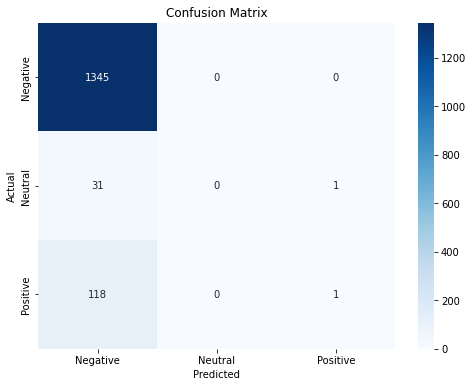

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Mendapatkan matriks kebingungan
cm = confusion_matrix(y_test, y_pred)

categories = ['Negative', 'Neutral', 'Positive']

# Visualisasi matriks kebingungan menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [24]:
# Menampilkan kalimat yang diprediksi untuk beberapa sampel
for i in range(5):  # Mengambil 5 sampel
    sample_index = i  # Ganti dengan indeks sampel yang ingin Anda lihat
    probabilities = naive_bayes.predict_proba(X_test_tfidf[sample_index].reshape(1, -1))
    predicted_class = naive_bayes.classes_[probabilities.argmax()]
    predicted_sentence = X_test.iloc[sample_index]  # Menyimpan kalimat asli dari sampel
    print(f"Sampel  {sample_index + 1}:")
    print(f"Predicted Class: {predicted_class}")
    print(f"Sentence: {predicted_sentence}")
    print()

Sampel  1:
Predicted Class: Negative
Sentence: lengkap administrasi kendara lengkap bayar pajak kendara motor mana premi swdkllj pt jasa raharja tolong korbankorban lakalantas indonesia jasaraharja bumnuntukindonesia

Sampel  2:
Predicted Class: Negative
Sentence: wakil rakyat indonesia wajib taat bayar pajak cemas sekian

Sampel  3:
Predicted Class: Negative
Sentence: akhirakhir benci paja indonesia kena pajak manfaat pajak bayar

Sampel  4:
Predicted Class: Negative
Sentence: asn tri uang hidup gelimang harta tau zaman orbadi indonesia bayar pajak kayak jabat pajak boro tax returned kaya amrik salah orang malas bayar pajak bu tau bu

Sampel  5:
Predicted Class: Negative
Sentence: maybe indonesia headline darah darah bayar pajakpara jabat pajak nya bermewahmewahan



In [25]:
# Menampilkan sampel dengan kelas positif
print("Samples with Positive Sentiment:")
positive_samples = X_test[y_pred == 'Positive']
for i, sample in enumerate(positive_samples):
    print(f"Sample {i+1}:")
    print(f"Sentence: {sample}")
    print()

# Menampilkan sampel dengan kelas negatif
print("Samples with Negative Sentiment:")
negative_samples = X_test[y_pred == 'Negative']
for i, sample in enumerate(negative_samples):
    print(f"Sample {i+1}:")
    print(f"Sentence Negative: {sample}")
    print()

# Menampilkan sampel dengan kelas netral
print("Samples with Neutral Sentiment:")
neutral_samples = X_test[y_pred == 'Neutral']
for i, sample in enumerate(neutral_samples):
    print(f"Sample {i+1}:")
    print(f"Sentence Netral: {sample}")
    print()


Samples with Positive Sentiment:
Sample 1:
Sentence: starting january dgt has reopened the vat refund for tourists service at international airports indonesia

Sample 2:
Sentence: wts want sale aab all about pc doyoung jaehyun nct min take pc ya take kasih free digipack baddies incl packing exc biaya admin and pajak batam indonesia free ongkir bantu rt ya bu banget thankyou slowacid dicon natrep sg

Samples with Negative Sentiment:
Sample 1:
Sentence Negative: lengkap administrasi kendara lengkap bayar pajak kendara motor mana premi swdkllj pt jasa raharja tolong korbankorban lakalantas indonesia jasaraharja bumnuntukindonesia

Sample 2:
Sentence Negative: wakil rakyat indonesia wajib taat bayar pajak cemas sekian

Sample 3:
Sentence Negative: akhirakhir benci paja indonesia kena pajak manfaat pajak bayar

Sample 4:
Sentence Negative: asn tri uang hidup gelimang harta tau zaman orbadi indonesia bayar pajak kayak jabat pajak boro tax returned kaya amrik salah orang malas bayar pajak bu 

Sentence Negative: sri mulyani hambur uang negara gaji pegawai pajak hasil konsumtif korupsi peras rakyat jalan gaji karakter jelek langsung hukum mati indonesia stok manusia

Sample 1492:
Sentence Negative: pajak pangkalanbun buka layan kantor dukung program lapor spt tahun padan nik npwp pajak kuat indonesia maju pajakkuatindonesiamaju aminjaya pangkalanbanteng kotawaringinbarat

Sample 1493:
Sentence Negative: gas is looking for senior sales amp marketing specialist if you have what we need please apply at orang contact serunyabelajar gaji pajak bpjs payroll indonesia fyp

Sample 1494:
Sentence Negative: karyawan pajak ganti orang dipindahin menteri kapolda provinsi takut ahli indonesia orang pintar belajaf

Samples with Neutral Sentiment:


In [26]:
print("Samples with Neutral Sentiment:")
neutral_samples = X_test[y_pred == 'Neutral']
for i, sample in enumerate(neutral_samples):
    print(f"Sample {i+1}:")
    print(f"Sentence: {sample}")
    print()

Samples with Neutral Sentiment:


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")


accuracy_percentage = accuracy * 100
precision_percentage = precision * 100
recall_percentage = recall * 100

print("Accuracy: {:.2f}%".format(accuracy_percentage))
print("Precision: {:.2f}%".format(precision_percentage))
print("Recall: {:.2f}%".format(recall_percentage))

Accuracy: 89.97%
Precision: 46.68%
Recall: 33.61%


C:\Users\Dewan Dinata Tarigan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


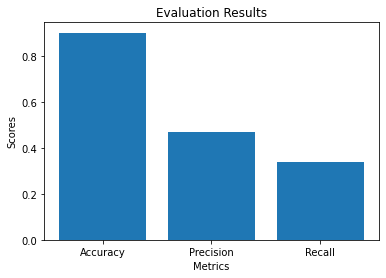

In [28]:
import matplotlib.pyplot as plt

# set data
metrics = ['Accuracy', 'Precision', 'Recall']
scores = [accuracy, precision, recall]

# create bar plot
fig, ax = plt.subplots()
ax.bar(metrics, scores)

# set axis labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Evaluation Results')

# display plot
plt.show()

In [29]:
from sklearn.metrics import confusion_matrix
import numpy as np


# Mencetak TP, TN, FP, FN untuk setiap kelas
for i in range(len(cm)):
    TP = cm[i, i]
    TN = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + TP
    FP = np.sum(cm[:, i]) - TP
    FN = np.sum(cm[i, :]) - TP
    print(f"Kelas: {i}")
    print(f"True Positive (TP): {TP}")
    print(f"True Negative (TN): {TN}")
    print(f"False Positive (FP): {FP}")
    print(f"False Negative (FN): {FN}")
    print()


Kelas: 0
True Positive (TP): 1345
True Negative (TN): 2
False Positive (FP): 149
False Negative (FN): 0

Kelas: 1
True Positive (TP): 0
True Negative (TN): 1464
False Positive (FP): 0
False Negative (FN): 32

Kelas: 2
True Positive (TP): 1
True Negative (TN): 1376
False Positive (FP): 1
False Negative (FN): 118



In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Inisialisasi model Naive Bayes
naive_bayes = MultinomialNB()
#naive_bayes = MultinomialNB(alpha=10.0, class_prior=None, fit_prior=False)

# Definisikan grid parameter yang akan diuji
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'fit_prior': [True, False],
    'class_prior': [None, [0.2, 0.3, 0.5]]  # Contoh penggunaan prior kelas manual
}


# Inisialisasi GridSearchCV dengan model dan parameter grid
grid_search = GridSearchCV(naive_bayes, param_grid, cv=5)

# Melakukan fitting grid search pada data train
grid_search.fit(X_train_tfidf, y_train)

# Menampilkan parameter terbaik yang ditemukan
print("Best Parameters:", grid_search.best_params_)

# Menggunakan model dengan parameter terbaik untuk prediksi
y_pred = grid_search.predict(X_test_tfidf)


Best Parameters: {'alpha': 10.0, 'class_prior': None, 'fit_prior': False}


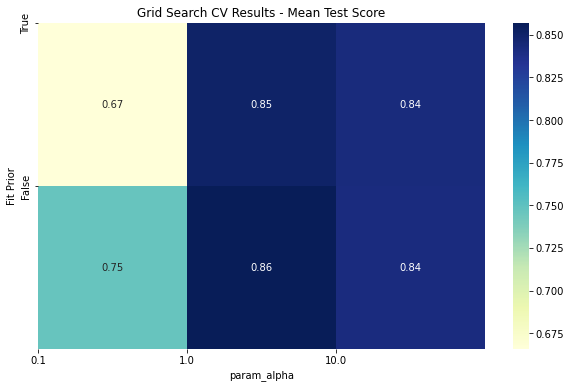

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat dataframe dari hasil GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)
param_columns = ['param_alpha', 'param_fit_prior', 'param_class_prior']
score_columns = ['mean_test_score', 'std_test_score']
results = results[param_columns + score_columns]

# Mengubah nilai None pada class_prior menjadi 'None' untuk keperluan visualisasi
results['param_class_prior'] = results['param_class_prior'].replace({None: 'None'})

# Mengubah kolom param_alpha menjadi tipe float untuk keperluan visualisasi
results['param_alpha'] = results['param_alpha'].astype(float)

# Membuat pivot table untuk menampilkan skor rata-rata validasi silang
pivot_table = results.pivot_table(index='param_fit_prior', columns=param_columns[0], values='mean_test_score')

# Membuat heat map
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title('Grid Search CV Results - Mean Test Score')
plt.xlabel(param_columns[0])
plt.ylabel('Fit Prior')
plt.xticks(ticks=range(len(param_grid['alpha'])), labels=param_grid['alpha'])
plt.yticks(ticks=range(len(param_grid['fit_prior'])), labels=param_grid['fit_prior'])
plt.show()


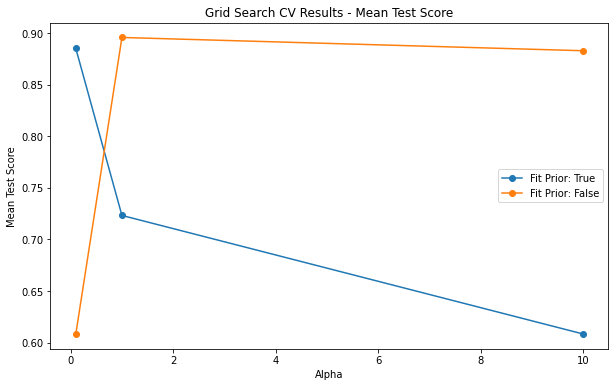

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Membuat list untuk menyimpan skor rata-rata validasi silang
alphas = param_grid['alpha']
fit_priors = param_grid['fit_prior']
mean_scores = results['mean_test_score']

# Menyiapkan array kosong untuk menyimpan skor rata-rata berdasarkan kombinasi parameter
scores_grid = np.empty((len(fit_priors), len(alphas)))

# Mengisi array dengan skor rata-rata sesuai dengan kombinasi parameter
for i, fit_prior in enumerate(fit_priors):
    for j, alpha in enumerate(alphas):
        index = i * len(alphas) + j
        scores_grid[i][j] = mean_scores[index]

# Membuat plot garis
plt.figure(figsize=(10, 6))
for i, fit_prior in enumerate(fit_priors):
    scores = scores_grid[i]
    plt.plot(alphas, scores, marker='o', label='Fit Prior: {}'.format(fit_prior))

# Menambahkan label dan judul plot
plt.xlabel('Alpha')
plt.ylabel('Mean Test Score')
plt.title('Grid Search CV Results - Mean Test Score')
plt.legend()

# Menampilkan plot garis
plt.show()


In [33]:
# Menampilkan hasil klasifikasi
from sklearn.metrics import classification_report

# Menampilkan laporan klasifikasi
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

    Negative       0.90      1.00      0.95      1345
     Neutral       0.00      0.00      0.00        32
    Positive       0.50      0.01      0.02       119

    accuracy                           0.90      1496
   macro avg       0.47      0.34      0.32      1496
weighted avg       0.85      0.90      0.85      1496



C:\Users\Dewan Dinata Tarigan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dewan Dinata Tarigan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dewan Dinata Tarigan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c